# **Final Project:** Predicting Employee Attrition: A Machine Learning Approach to Talent Retention

### *Leveraging HR data to identify employees at risk of leaving and provide actionable insights for retention strategies.*

#### **Professors:** Marc Torrens & Gal.la Garcia-Castany
#### **Enric A.** -  *MSc in Business Analytics 2024-2025*

---

In [112]:
# Data Manipulation & Utilities
import pandas as pd
import numpy as np
import math

# Visualization & Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno  # Ensure you have installed this via: pip install missingno
import shap             # Ensure you have installed this via: pip install shap

# Machine Learning Libraries

# Neural Networks
from sklearn.neural_network import MLPClassifier

# Metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Linear Models
from sklearn.linear_model import LogisticRegression

# Support Vector Machines
from sklearn.svm import SVC

# Ensemble Methods
from sklearn.ensemble import RandomForestClassifier

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Neighbors
from sklearn.neighbors import KNeighborsClassifier

# Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV

# Feature Selection
from sklearn.feature_selection import VarianceThreshold

# Pipeline & Transformation
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Decomposition
from sklearn.decomposition import PCA


# Other ML Libraries

# XGBoost
from xgboost import XGBClassifier


# Imbalanced Data Handling 

from imblearn.over_sampling import SMOTE

# Standard Library
from collections import Counter



# **Section 1) Data Acquisition and First Insights: Employee Attrition**

In this first step, we analyzed the **Employee Attrition** (*Dataset G7*)dataset to gain an initial understanding of the data and assess whether any preprocessing transformations are needed. The goal is to ensure that the dataset is clean, consistent, and properly structured before applying any machine learning models.

These initial observations help us design a tailored preprocessing pipeline and ensure that the next modeling steps are built on a solid data foundation.

---

In [57]:
# Load dataset
file_path = "Dataset G7.csv"
df = pd.read_csv(file_path)

In [58]:
# To show all columns 
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 200)  

# First 5 rows with all columns visible
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [59]:
# Now, we check the data types of all columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\n📌 Numerical Columns ({len(numerical_cols)}): {numerical_cols}")
print(f"\n📌 Categorical Columns ({len(categorical_cols)}): {categorical_cols}")


📌 Numerical Columns (26): ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

📌 Categorical Columns (9): ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [60]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include='object').columns.tolist()

# Display value counts for each categorical variable
print("📊 Summary of Categorical Variables:\n")
for col in categorical_columns:
    print(f"--- {col} ---")
    print(df[col].value_counts(dropna=False))
    print("\n")

📊 Summary of Categorical Variables:

--- Attrition ---
Attrition
No     1233
Yes     237
Name: count, dtype: int64


--- BusinessTravel ---
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64


--- Department ---
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


--- EducationField ---
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64


--- Gender ---
Gender
Male      882
Female    588
Name: count, dtype: int64


--- JobRole ---
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources

**Explanation:**  
With the code above, we displayed the possible values and frequency counts for each categorical variable in the dataset. This allowed us to gain a deeper understanding of how the data is distributed and identify patterns that might be useful during the modeling phase.

**Important Note:**  
While some features appear numerical at first glance, they actually represent **ordinal categorical variables**, where each number corresponds to a specific category or rating level. These variables WERE already encoded as integers but require proper interpretation during analysis.

Below is a list of such variables along with the meaning of each numerical code:

---

#### 🔸 **Education**
| Code | Category         |
|------|------------------|
| 1    | Below College     |
| 2    | College           |
| 3    | Bachelor          |
| 4    | Master            |
| 5    | Doctor            |

#### 🔸 **Environment Satisfaction**
| Code | Category     |
|------|--------------|
| 1    | Low          |
| 2    | Medium       |
| 3    | High         |
| 4    | Very High    |

#### 🔸 **Job Involvement**
| Code | Category     |
|------|--------------|
| 1    | Low          |
| 2    | Medium       |
| 3    | High         |
| 4    | Very High    |

#### 🔸 **Job Satisfaction**
| Code | Category     |
|------|--------------|
| 1    | Low          |
| 2    | Medium       |
| 3    | High         |
| 4    | Very High    |

#### 🔸 **Performance Rating**
| Code | Category     |
|------|--------------|
| 1    | Low          |
| 2    | Good         |
| 3    | Excellent    |
| 4    | Outstanding  |

#### 🔸 **Relationship Satisfaction**
| Code | Category     |
|------|--------------|
| 1    | Low          |
| 2    | Medium       |
| 3    | High         |
| 4    | Very High    |

#### 🔸 **Work-Life Balance**
| Code | Category |
|------|----------|
| 1    | Bad      |
| 2    | Good     |
| 3    | Better   |
| 4    | Best     |

---

Understanding these mappings is crucial when interpreting model outputs and drawing meaningful business conclusions. We’ll treat these features appropriately in the modeling stage.


**📌 Assumptions for Numerical Variables:**

To ensure consistency and interpretability throughout the project, the following assumptions have been made regarding the units and meaning of the numerical variables:

- **Age**: Employee age in **years**.
- **DistanceFromHome**: Distance from the employee’s home to the office, measured in **kilometers (km)**.
- **DailyRate**: Daily wage in **euros (€)**.
- **HourlyRate**: Hourly wage in **euros (€)**.
- **MonthlyIncome**: Total gross monthly salary in **euros (€)**.
- **MonthlyRate**: Monthly base compensation in **euros (€)**.
- **PercentSalaryHike**: Percentage increase in salary compared to the previous year.
- **TotalWorkingYears**: Total professional experience of the employee in **years**.
- **YearsAtCompany**: Number of years the employee has worked at the current company.
- **YearsInCurrentRole**: Number of years the employee has been in their current role.
- **YearsSinceLastPromotion**: Number of years since the employee’s last promotion.
- **YearsWithCurrManager**: Number of years the employee has worked with their current manager.
- **NumCompaniesWorked**: Total number of different companies the employee has worked at.
- **TrainingTimesLastYear**: Number of training sessions attended in the last year.
- **StandardHours**: Number of contractual hours per week (assumed constant at **80**, likely a placeholder).
- **EmployeeNumber**: Internal employee ID (assumed to be unique, not to be used for analysis).
- **EmployeeCount**: Constant column (value = 1), assumed to be a placeholder—may be dropped.

These assumptions allow us to maintain clarity when interpreting visualizations and drawing business conclusions. 

In [61]:
# Missing values per column (Relative)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100  # in %

# DataFrame (better visualization)
missing_data = pd.DataFrame({
    'Missing Values': missing_values, 
    'Percentage (%)': missing_percentage
})

# Here we keep only columns with missing data and sort them by percentage
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage (%)', ascending=False)

# Summary
print(f"❗ Total Columns with Missing Values: {missing_data.shape[0]} out of {df.shape[1]} columns ({(missing_data.shape[0] / df.shape[1]) * 100:.2f}%)")
print(f"📌 Total Rows in Dataset: {df.shape[0]}\n")




❗ Total Columns with Missing Values: 0 out of 35 columns (0.00%)
📌 Total Rows in Dataset: 1470



#### **Conclusions:**  
In this first section, we explored the overall structure of the dataset to understand what we’re working with. The dataset contains 1,470 entries, each representing an individual employee, and includes 35 features in total. Out of these, 26 are numerical variables such as Age, Monthly Income, Job Satisfaction, and others that describe employee characteristics and professional background. The remaining are categorical features like Attrition, Business Travel frequency, Education Field, Gender, Job Role, and more, giving us a comprehensive view of each employee’s profile within the organization.

In addition to identifying categorical variables, we also interpreted those encoded numerically but representing ordered categories, such as Education Level, Performance Rating, and Work-Life Balance, ensuring they are treated accordingly in the modeling phase.

As part of this initial data exploration, we also defined the assumptions that will guide our analysis. For instance, we assume financial values such as **MonthlyIncome**, **HourlyRate**, and **DailyRate** are expressed in **euros (€)**; **DistanceFromHome** is measured in **kilometers (km)**; and experience-related features like **YearsAtCompany** or **TotalWorkingYears** are in **years**. Other values such as **PercentSalaryHike** are interpreted as percentage increases, and training counts or company transitions are treated as discrete units.

A key insight at this stage is that the dataset is complete, with **no missing values**. This allows us to proceed directly to feature engineering and modeling, saving time and reducing complexity. With a clean, rich, and well structured dataset, and clear assumptions for interpreting the data, we are well, positioned to move forward and start uncovering meaningful patterns that can support business decision-making.



# **Section 2) Data Preparation**

Before jumping into model building, we need to make sure the data is in the best possible shape. In this section, we’ll prepare the dataset so that it’s ready for accurate and meaningful machine learning. A solid preprocessing phase is key to avoid misleading results and ensure that the models we build later reflect real patterns, not noise.

Here’s what we’ll focus on:

- **Train/Test Split**: First, we’ll split the data to prevent information leakage and ensure our models are evaluated properly on unseen data.
- **Encoding Categorical Variables**: Since most ML algorithms work with numbers, we’ll convert categorical fields like Gender, Department, or Job Role into a numerical format while preserving their meaning.
- **Handling Ordinal Features**: We'll make sure that variables like Education Level or Performance Rating, which follow a natural order, are treated accordingly in our models.
- **Outlier Detection**: We'll take a closer look at variables such as Monthly Income or YearsAtCompany to identify extreme values that could skew the training process.
- **Feature Scaling**: For algorithms that are sensitive to scale, we’ll normalize features like Age, DistanceFromHome, and MonthlyRate to ensure consistent input.
- **Feature Selection**: Finally, we’ll remove constant, redundant, or irrelevant features that don’t add value—keeping only what truly helps us predict attrition.

This preparation step helps us build a cleaner, smarter foundation for modeling and ensures that every insight we draw is reliable and business-relevant.

---

## **2.1) Train/Validation/Test Split**

Before building any machine learning model, we need to simulate how it will perform on unseen data. That’s why we split the dataset into three subsets:

- **Training set (70%)**: Used to train the model.
- **Validation set (15%)**: Used to fine-tune the model and evaluate different algorithms/hyperparameters.
- **Test set (15%)**: Used only once at the very end to evaluate final performance on unseen data.

This setup ensures that we avoid **data leakage** and gives us a realistic view of how well our model would perform in a real business scenario.

Given our dataset size (1,470 entries), we belive that this split is the best, without compromising performance.

---

In [62]:
# Separate features and target
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

# Here we splitted into Train (70%) and Temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.30,
    stratify=y,
    random_state=42
)

# Then we splitted Temp into Validation (15%) and Test (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,
    stratify=y_temp,
    random_state=42
)

# Finally we printed the sizes and target class distribution
print(f"Train set: {X_train.shape} | Attrition:\n{y_train.value_counts(normalize=True)}\n")
print(f"Validation set: {X_val.shape} | Attrition:\n{y_val.value_counts(normalize=True)}\n")
print(f"Test set: {X_test.shape} | Attrition:\n{y_test.value_counts(normalize=True)}")


Train set: (1029, 34) | Attrition:
Attrition
No     0.838678
Yes    0.161322
Name: proportion, dtype: float64

Validation set: (220, 34) | Attrition:
Attrition
No     0.840909
Yes    0.159091
Name: proportion, dtype: float64

Test set: (221, 34) | Attrition:
Attrition
No     0.837104
Yes    0.162896
Name: proportion, dtype: float64


##### **Explanation**

We used a two-step stratified split to preserve the balance between employees who stayed vs. left the company in all three subsets. This is especially important because attrition is relatively low (~16%).

In real business scenarios, this approach mirrors how companies often separate data for model training (based on historical data), tuning (via A/B testing or parameter search), and final validation (before launching to production).

By creating a separate validation set, we’re setting ourselves up to test different models and configurations in a controlled way, without “cheating” by peeking at the test set.

We’ll use the validation set to evaluate models, and we’ll save the test set for a final unbiased performance check.


## **2.2) Data Removal**

Before diving into feature engineering or modeling, it’s important to check whether all features are relevant and contribute value. Removing features that are redundant, irrelevant, or too uniform helps streamline the model, improve training time, and reduce noise.

In this section, we evaluate our features through three lenses:
1. Correlation (redundancy between features)
2. Domain relevance (business sense)
3. Statistical contribution (low variance)

Even if no features are removed in the end, documenting this process helps justify why all variables were kept and demonstrates that we evaluated the dataset with care.

---

### **2.2.1) Quantitative Analysis: Correlation Between Features**

----

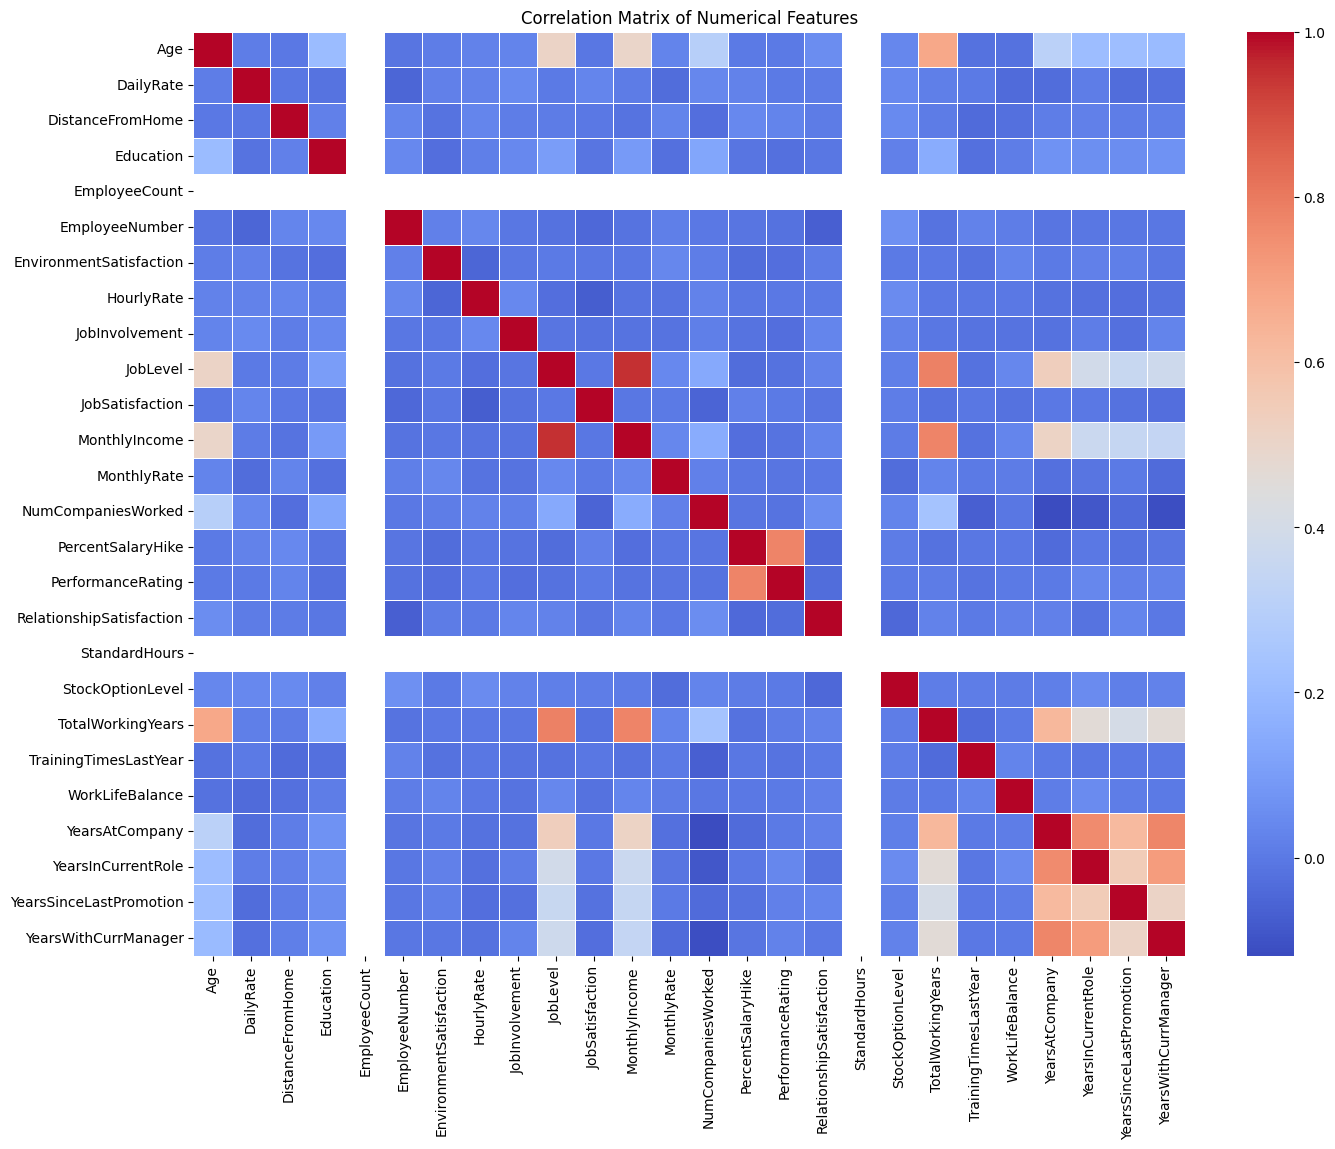

In [63]:
# Compute correlation matrix for numerical features
correlation_matrix = df.select_dtypes(include='number').corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


##### **Explanation**

We analyzed the correlation between numerical features to detect multicollinearity. In this case we can see how most features show **low to moderate correlation**, meaning they are capturing **unique information**.

A few pairs show moderate correlation (like *TotalWorkingYears* & *Age*, or *YearsAtCompany* & *YearsWithCurrManager*), but none cross the red flag **threshold of 0.85+,** which is usually when we consider removing one of them.

Features like *MonthlyIncome*, *JobLevel*, and *TotalWorkingYears* are **slightly correlated**, but they reflect **different business** dimensions (pay, seniority, and experience), so we keep them.

So in this case we decided to keep all the features beased on this analysis.


### **2.2.2) Qualitative Analysis: Domain Relevance Check**

---


In [64]:
# Drop irrelevant/constant fields
df.drop(columns=['EmployeeNumber', 'StandardHours', 'EmployeeCount'], inplace=True)


##### **Explanation:**
We also reviewed each feature from a business point of view. Features such as **EmployeeNumber**, **StandardHours**, and **EmployeeCount** appear to carry no predictive value, as they are either:
- Identifiers (like EmployeeNumber),
- Constants (StandardHours = 80 for all entries), or
- Placeholder fields (EmployeeCount = 1 for all entries).

These features do not contribute any information to the model and can safely be removed.

We keep all other variables as they provide insight into employee experience, satisfaction, demographics, or compensation—each of which is relevant to attrition prediction.


### **2.2.3) Low Variance Feature Detection**

---

In [65]:
# Only apply to numerical features
numerical_df = df.select_dtypes(include='number')

# Check variance of each feature
selector = VarianceThreshold(threshold=0.01)
selector.fit(numerical_df)
low_variance_features = numerical_df.columns[~selector.get_support()]

print("Low variance features:", list(low_variance_features))


Low variance features: []


##### **Explanation**

We applied a variance threshold to check whether any numerical features showed little to no variation across records—making them useless for model training.

In our case, no additional low-variance features were found, meaning our variables are generally well-distributed and contain useful information.



## **2.3) Handling Categorical Variables & Scaling**

To prepare our dataset for machine learning, we need to convert categorical variables into a format that algorithms can understand. Most ML models work only with numerical input, so this transformation step is essential.

We split the categorical features into two types:

- **Ordinal variables**: These have a meaningful order (e.g. Education Level, Job Satisfaction).
- **Nominal variables**: These are categories without order (e.g. Gender, Department, Job Role).

To ensure consistency and avoid data leakage, we handle all transformations using a **scikit-learn Pipeline**, which makes our preprocessing modular, reusable, and production-ready. This will allow us to later apply the same pipeline to new or unseen employee data, just like in a real-world HR analytics solution.

---

In [66]:
# Encode target
df['Attrition'] = df['Attrition'].str.strip().str.lower().map({'yes': 1, 'no': 0})

# Check for NaNs in target
print("Missing in Attrition column:", df['Attrition'].isna().sum())

# Split base features and target
X = df.drop(columns='Attrition')
y = df['Attrition']

# Define categorical and numerical features
nominal_features = ['BusinessTravel', 'Department', 'EducationField', 
                    'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
numerical_features = X.select_dtypes(include='number').columns.tolist()

# Base preprocessing pipeline
preprocessor_base = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'), nominal_features),
    ('numeric', StandardScaler(), numerical_features)
])

print("✅ Base pipeline: {} nominal and {} numerical features.".format(len(nominal_features), len(numerical_features)))

# ✅ Log-transform skewed features
df_log = df.copy()
log_features = ['MonthlyIncome', 'YearsAtCompany', 'TotalWorkingYears', 'YearsSinceLastPromotion']
for feature in log_features:
    df_log[feature] = np.log1p(df_log[feature])

# Split log-transformed features and target
X_log = df_log.drop(columns='Attrition')
y_log = df_log['Attrition']

# Log-preprocessing pipeline (same structure)
preprocessor_log = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'), nominal_features),
    ('numeric', StandardScaler(), numerical_features)
])

print("✅ Log transformation applied to:", log_features)


Missing in Attrition column: 0
✅ Base pipeline: 7 nominal and 23 numerical features.
✅ Log transformation applied to: ['MonthlyIncome', 'YearsAtCompany', 'TotalWorkingYears', 'YearsSinceLastPromotion']


#### **Explanation:**

In this section, we prepared the dataset for modeling by transforming all features into a format that machine learning algorithms can understand. We created two versions of the dataset,  one standard and one with log-transformed numerical features, so that we can use different models effectively later on.

##### **Base Setup:**

- **Nominal Features Handled**:  
  We identified seven categorical variables without any natural order:  
  *BusinessTravel*, *Department*, *EducationField*, *Gender*, *JobRole*, *MaritalStatus*, and *OverTime*.  
  These were encoded using **One-Hot Encoding**, which converts each category into a separate binary column. This avoids introducing artificial ranking between categories.

- **Numerical Features Handled**:  
  All numerical variables were scaled using **StandardScaler**, which transforms them to have a mean of 0 and a standard deviation of 1. This is especially important when using models that are sensitive to feature magnitude, like logistic regression or neural networks.

We wrapped these transformations into a *ColumnTransformer*, which applies each transformation only to its relevant columns, ensuring clean and consistent preprocessing. This structure will be reused later across training, validation, and test datasets.

##### **Log-Transformed Version:**

In addition to the base setup, we also created a second version of the dataset where the following skewed variables were log-transformed:

- *MonthlyIncome*
- *YearsAtCompany*
- *TotalWorkingYears*
- *YearsSinceLastPromotion*

We used the `log1p()` transformation, which handles zeros safely and compresses large values. This version of the data will be used for models like **logistic regression** or **neural networks**, which assume more normal distributions.

By maintaining two separate preprocessing flows, we’re able to choose the best setup depending on the model we want to use, without affecting consistency or data quality.




## **2.4) Outlier Dection & Handling**

In this section we analyzed the outleirs and detemriend if there needed some inputations and when. We did this why plotting the distribution of all numerical an computting it's skeweness. 

---

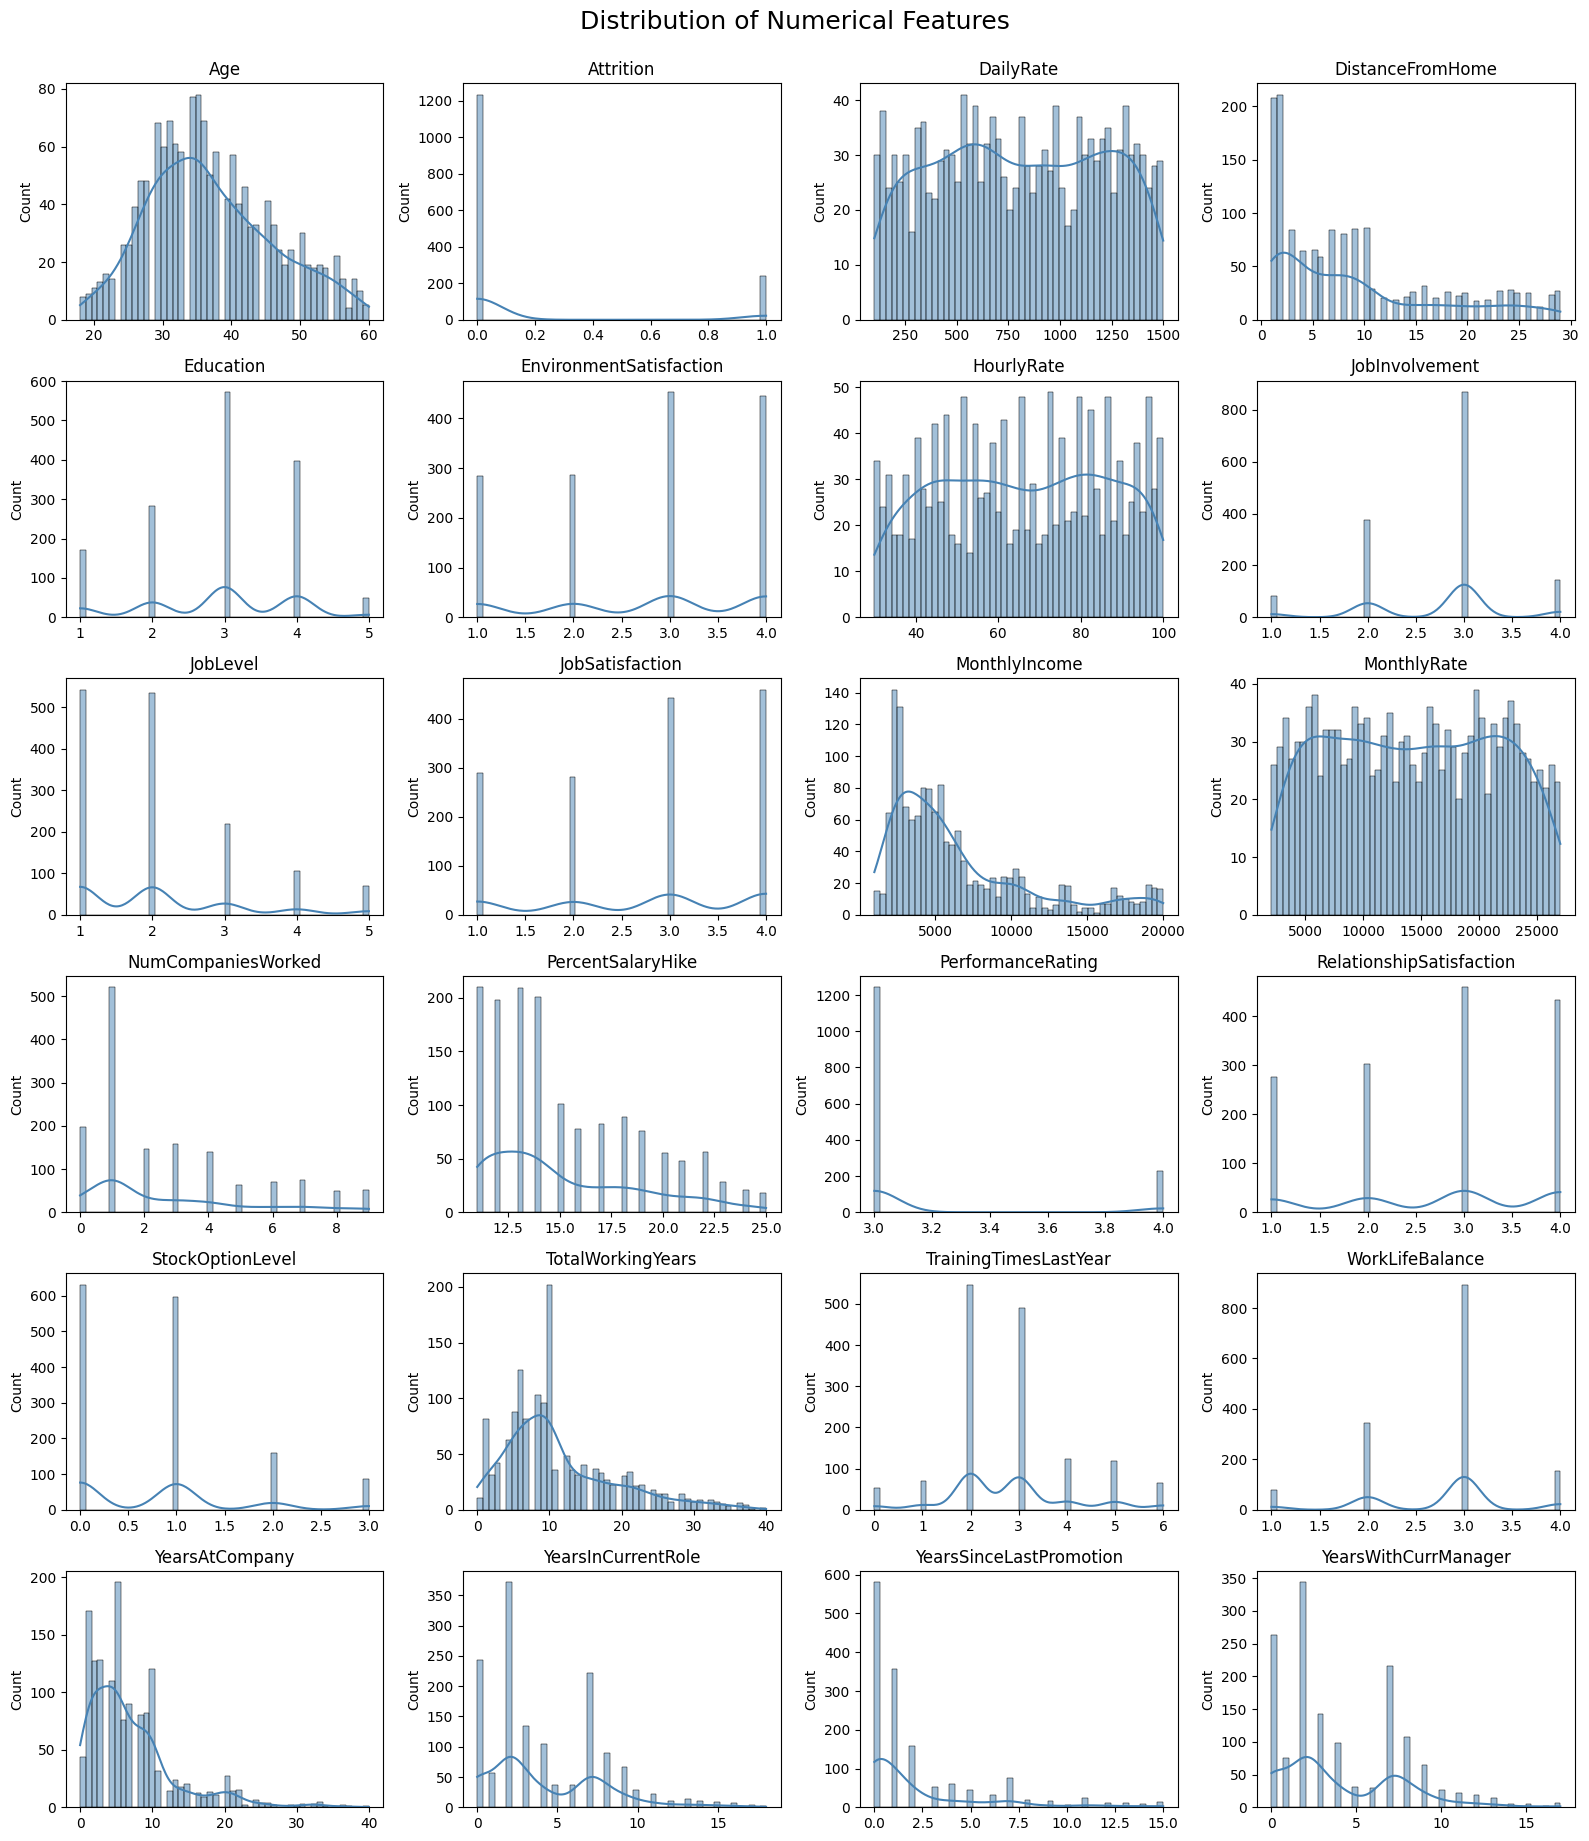

In [67]:
# Select all numerical features
numerical_df = df.select_dtypes(include=["float64", "int64"])
num_features = numerical_df.columns

# Define rows and columns for dynamic plotting
num_plots = len(num_features)
num_cols = 4
num_rows = math.ceil(num_plots / num_cols)

# Plot histograms with KDE for each numerical feature
plt.figure(figsize=(16, num_rows * 3))
for i, col in enumerate(num_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(numerical_df[col], bins=50, kde=True, color='steelblue')
    plt.title(col)
    plt.xlabel("")
plt.tight_layout()
plt.suptitle("Distribution of Numerical Features", fontsize=18, y=1.02)
plt.show()


In [68]:
# Skewness computation 
skewness = numerical_df.skew().sort_values(ascending=False)
skewness_df = pd.DataFrame({'Feature': skewness.index, 'Skewness': skewness.values})
skewness_df.reset_index(drop=True, inplace=True)

# Display it
skewness_df


,Feature,Skewness
0,YearsSinceLastPromotion,1.984290
1,PerformanceRating,1.921883
2,Attrition,1.844366
3,YearsAtCompany,1.764529
4,MonthlyIncome,1.369817
5,TotalWorkingYears,1.117172
6,NumCompaniesWorked,1.026471
7,JobLevel,1.025401
8,StockOptionLevel,0.968980
9,DistanceFromHome,0.958118


##### **Explanation:**
In this part of the analysis, we looked into the numerical features to check for any potential outliers or extreme skewness that could affect the modeling process. First, we used boxplots to visually detect outliers and histograms with KDE lines to understand the shape of each variable's distribution. Then, we computed the skewness for every numerical feature to get a more quantitative view.

We found that some variables like *MonthlyIncome*, *YearsAtCompany*, and *YearsSinceLastPromotion* have visible outliers and high skewness values (greater than 1.0). However, after reviewing these cases, we saw that they make sense in an HR setting — for example, some employees naturally earn more, have stayed longer at the company, or haven’t been promoted in years. These aren’t data errors; they reflect real-world variability.

So, we decided:
- **Not to remove any outliers**, since they represent valid employee profiles.
- **Not to apply any transformations for now**, but we’ve identified the variables that are heavily skewed in case we need to adjust them later.

If we end up using models that are sensitive to skewed distributions, like logistic regression or neural networks, we might log-transform some of these features. But if we focus on tree-based models like Random Forest or XGBoost, which are more robust to outliers and skewness, then no transformation is needed.

This gives us flexibility while keeping the dataset as close to reality as possible.

## **2.5) Feature Scaling**

In this step, we applied the preprocessing pipeline that we defined earlier in Section 2.3. The pipeline includes two key transformations:

- **Categorical variables** are handled using **One-Hot Encoding**, converting each category into binary columns.
- **Numerical variables** are standardized using **StandardScaler**, which centers the data around a mean of 0 with a standard deviation of 1.

We prepared two different versions of the dataset:

- The **base version** uses the original numerical values.
- The **log-transformed version** includes a log transformation of skewed features such as *MonthlyIncome*, *YearsAtCompany*, *TotalWorkingYears*, and *YearsSinceLastPromotion*. This version is intended for models that are sensitive to skewness (e.g., logistic regression, neural networks, SVMs).

By keeping scaling inside the pipeline and applying it only to the training set (`fit_transform`), we avoid data leakage. The same transformation is then applied to the validation and test sets (`transform`). This setup keeps preprocessing consistent, clean, and reusable for different types of models.

At this point, both the base and log-transformed datasets are fully encoded, scaled, and ready for model training.

---

In [69]:
# Split base data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42)

# Split log-transformed data
X_train_log, X_temp_log, y_train_log, y_temp_log = train_test_split(X_log, y_log, test_size=0.30, stratify=y_log, random_state=42)
X_val_log, X_test_log, y_val_log, y_test_log = train_test_split(X_temp_log, y_temp_log, test_size=0.50, stratify=y_temp_log, random_state=42)

# Apply base preprocessing
X_train_base_processed = preprocessor_base.fit_transform(X_train)
X_val_base_processed = preprocessor_base.transform(X_val)
X_test_base_processed = preprocessor_base.transform(X_test)

# Apply log-preprocessing
X_train_log_processed = preprocessor_log.fit_transform(X_train_log)
X_val_log_processed = preprocessor_log.transform(X_val_log)
X_test_log_processed = preprocessor_log.transform(X_test_log)

# Confirm final shapes
print("🔹 Base Version:")
print(f"Train: {X_train_base_processed.shape} | Validation: {X_val_base_processed.shape} | Test: {X_test_base_processed.shape}\n")

print("🔹 Log-Transformed Version:")
print(f"Train: {X_train_log_processed.shape} | Validation: {X_val_log_processed.shape} | Test: {X_test_log_processed.shape}")



🔹 Base Version:
Train: (1029, 51) | Validation: (220, 51) | Test: (221, 51)

🔹 Log-Transformed Version:
Train: (1029, 51) | Validation: (220, 51) | Test: (221, 51)


## **2.6) Feature Selection**

To understand which features contribute most to predicting attrition, we trained a Random Forest model on the preprocessed training set and extracted feature importances. This gives us an idea of which variables the model relies on the most when making decisions.


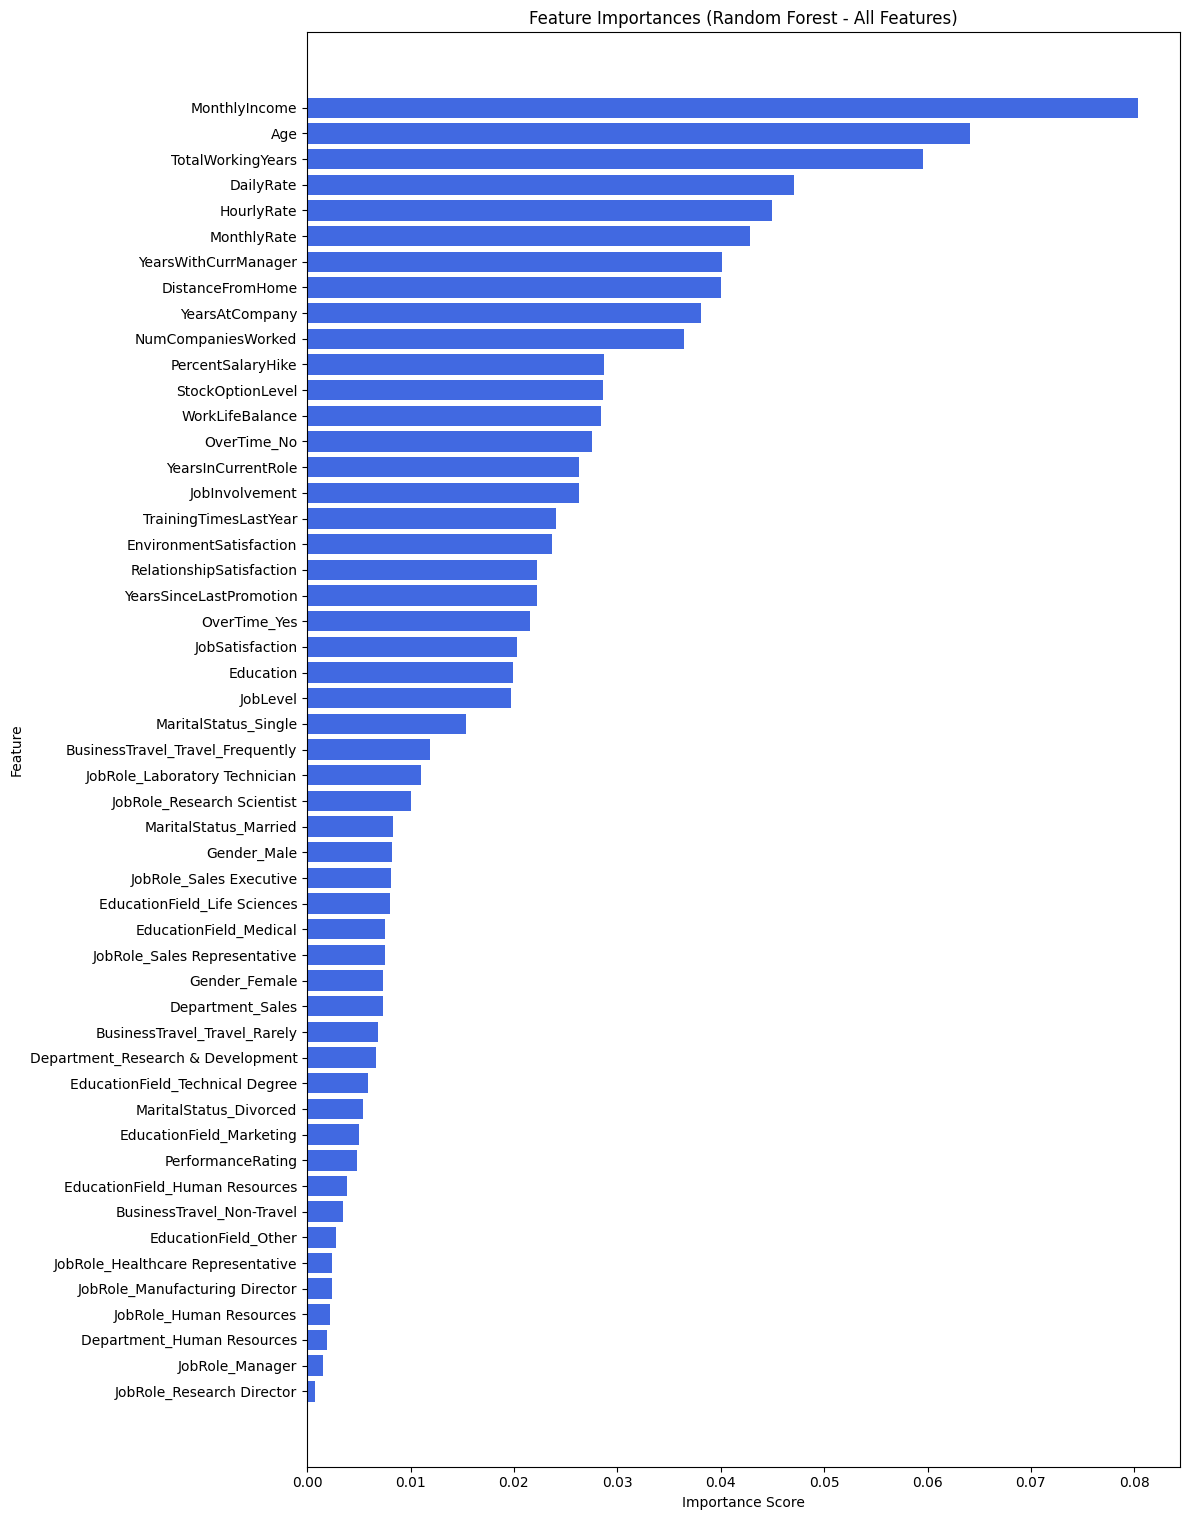

In [70]:
# Apply base preprocessing to training set
X_train_processed = preprocessor_base.fit_transform(X_train)

# Get feature names after encoding
encoded_feature_names = preprocessor_base.named_transformers_['onehot'].get_feature_names_out(nominal_features)
all_feature_names = list(encoded_feature_names) + numerical_features

# Train Random Forest on preprocessed data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_processed, y_train)

# Extract feature importances
feature_importance = pd.DataFrame({
    "Feature": all_feature_names,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Plot all feature importances
plt.figure(figsize=(12, len(feature_importance) * 0.3))
plt.barh(feature_importance["Feature"], feature_importance["Importance"], color="royalblue")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importances (Random Forest - All Features)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()




##### **Explantion:**

At the top, we find *MonthlyIncome*, *Age*, and *TotalWorkingYears*, all of which are strong indicators of employee experience, compensation, and life stage. Other relevant numerical features include *HourlyRate*, *DailyRate*, *YearsWithCurrManager*, and *YearsAtCompany*, which also make sense in terms of their influence on attrition.

Some categorical variables also contribute meaningfully, *OverTime_No* and *OverTime_Yes* have moderate importance, confirming that working overtime plays a role in whether people stay or leave. A few encoded job roles and education fields appear near the bottom of the ranking. These variables have very low importance, suggesting they don’t help much in predicting attrition in this dataset.

Again, we won’t remove any features just yet, since tree-based models like Random Forest can handle irrelevant variables well. However, this ranking helps us understand what matters most and may guide future feature selection if we want to simplify the model.


## **2.7) Feature Interaction**

In this section, we created new features by combining existing ones to uncover deeper patterns that may affect employee attrition. These engineered features are especially useful for linear models like logistic regression or neural networks, which don’t capture interactions automatically.

We’ll use this enhanced version only with models that benefit from it, and keep the original structure untouched for tree-based models.

We created four new features that reflect business-relevant dynamics:
  - *Income_per_Year*: measures salary relative to experience.
  - *Years_without_promotion*: flags employees stuck in the same position for years.
  - *Years_in_same_role*: shows whether someone has grown within the company or remained static.
  - *Salary_to_Age_ratio*: highlights potentially underpaid or overpaid profiles based on age.

These variables can capture real attrition triggers like salary frustration, promotion delays, or lack of mobility. Negative values were clipped to zero to avoid noise from recent hires or early-stage employees.

We then re-split the data and updated the list of numerical features for this version of the pipeline.

---

In [71]:
# Create feature interactions in df_log
df_log_interact = df_log.copy()

df_log_interact['Income_per_Year'] = df_log_interact['MonthlyIncome'] / (df_log_interact['TotalWorkingYears'] + 1)
df_log_interact['Years_without_promotion'] = df_log_interact['YearsAtCompany'] - df_log_interact['YearsSinceLastPromotion']
df_log_interact['Years_in_same_role'] = df_log_interact['YearsAtCompany'] - df_log_interact['YearsInCurrentRole']
df_log_interact['Salary_to_Age_ratio'] = df_log_interact['MonthlyIncome'] / (df_log_interact['Age'] + 1)

# Replace negative values with 0
df_log_interact['Years_without_promotion'] = df_log_interact['Years_without_promotion'].clip(lower=0)
df_log_interact['Years_in_same_role'] = df_log_interact['Years_in_same_role'].clip(lower=0)

# Split the dataset for models that will use interactions
X_log_interact = df_log_interact.drop(columns='Attrition')
y_log_interact = df_log_interact['Attrition']

# Split train/val/test
X_train_log_int, X_temp_log_int, y_train_log_int, y_temp_log_int = train_test_split(X_log_interact, y_log_interact, test_size=0.30, stratify=y_log_interact, random_state=42)
X_val_log_int, X_test_log_int, y_val_log_int, y_test_log_int = train_test_split(X_temp_log_int, y_temp_log_int, test_size=0.50, stratify=y_temp_log_int, random_state=42)

# Update numerical feature list
numerical_features_interact = X_train_log_int.select_dtypes(include='number').columns.tolist()

# Updated preprocessor for this version
preprocessor_log_interact = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'), nominal_features),
    ('numeric', StandardScaler(), numerical_features_interact)
])

# ✅ Confirm everything ran
print("✅ Feature interactions created and data split.")
print(f"Train shape: {X_train_log_int.shape}, Val: {X_val_log_int.shape}, Test: {X_test_log_int.shape}")
print("Numerical features now include:", numerical_features_interact[-4:])  # show just the 4 new ones



✅ Feature interactions created and data split.
Train shape: (1029, 35), Val: (220, 35), Test: (221, 35)
Numerical features now include: ['Income_per_Year', 'Years_without_promotion', 'Years_in_same_role', 'Salary_to_Age_ratio']


## **2.8) PCA - Principal Component Analysis**

In this section we used the PCA to reduce the number of features while keeping most of the information in the dataset. It transforms the data into a new set of components that represent the directions of highest variance. These components are combinations of the original features, ordered by how much variability they explain.

In practical terms, we decided to use PCA becuase we belive that it could help us when we have many features and we want to simplify the data, reduce noise, avoid overfitting, or speed up model training. It's especially useful for **models that are sensitive to high-dimensional data**, like **logistic regression, SVMs**, or **neural networks**. However, we avoid using it with models like **random forests** or **XGBoost** because those can already handle many features well and benefit from keeping the original feature structure.

---

In [72]:
# Base preprocessed data
X_train_base_processed = preprocessor_base.fit_transform(X_train)
print("Number of features after preprocessing (base):", X_train_base_processed.shape[1])

# Log version with interactions
X_train_log_int_processed = preprocessor_log_interact.fit_transform(X_train_log_int)
print("Number of features after preprocessing (log + interactions):", X_train_log_int_processed.shape[1])


Number of features after preprocessing (base): 51
Number of features after preprocessing (log + interactions): 55


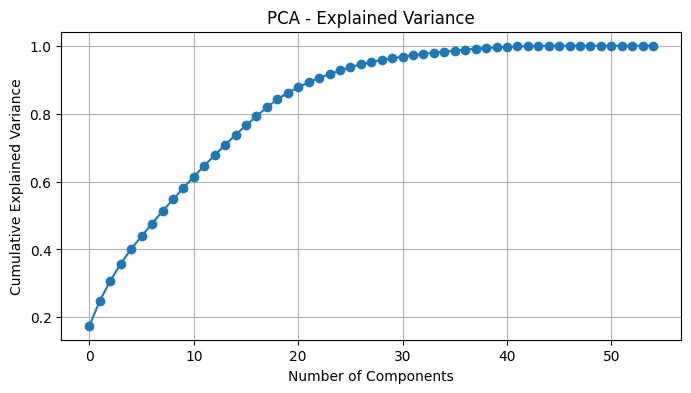

In [73]:
# Apply PCA (after preprocessing)
pca = PCA().fit(X_train_log_int_processed)

# Plot cumulative explained variance
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.grid(True)
plt.show()


In [74]:
# Fit the preprocessor on training data with log + interactions
X_train_log_int_processed = preprocessor_log_interact.fit_transform(X_train_log_int)
X_val_log_int_processed = preprocessor_log_interact.transform(X_val_log_int)
X_test_log_int_processed = preprocessor_log_interact.transform(X_test_log_int)

# Fit PCA on the training set
pca = PCA(n_components=0.95, random_state=42)  # Keep 95% of explained variance
X_train_pca = pca.fit_transform(X_train_log_int_processed)

#Apply the same transformation to val and test
X_val_pca = pca.transform(X_val_log_int_processed)
X_test_pca = pca.transform(X_test_log_int_processed)

# Confirmation
print("✅ PCA applied to interaction-processed data (95% variance retained)")
print("Original shape:", X_train_log_int_processed.shape)
print("Reduced shape:", X_train_pca.shape)


✅ PCA applied to interaction-processed data (95% variance retained)
Original shape: (1029, 55)
Reduced shape: (1029, 28)


##### **Explaantion:**

We started by checking how many features we had after applying preprocessing. 
  - The base version (with categorical encoding and scaling) had **51 features**
  - The log-transformed version with interactions had **55 features**

While these numbers are manageable, we still wanted to understand how much dimensionality could be reduced without losing important information. Then, We applied PCA to the processed **log+interactions dataset** and plotted the **cumulative explained variance**. We found that around **30 components** were enough to retain **95% of the original variance**, meaning we could cut the number of features nearly in half without major loss of information.

Given this, we created a new version of the training data with PCA applied, but we will only use it for models that benefit from reduced dimensions:
- Logistic Regression
- SVM
- Neural Networks

For other models like Random Forest or XGBoost, we won’t use PCA, since these models can already deal with many features, and reducing dimensions might even remove meaningful splits or relationships. We belive that with this approach we could optimize the performance and training time without sacrificing accuracy or interpretability where it matters.

## **2.9) Conclusions:**

In this preprocessing phase, we explored, cleaned, and prepared the dataset to ensure it was ready for modeling. We handled missing values (none found), encoded categorical features, scaled numerical ones, and engineered new variables to uncover deeper relationships. We also explored outliers and skewness, and created interaction features where we believed they could provide business insight.

To keep our models accurate and flexible, we built **three separate training sets**, each tailored to different types of models:

- A **base version** for tree-based models like Random Forest and XGBoost.
- A **log-transformed + interaction version** for models that benefit from engineered features (e.g. Decision Trees).
- A **PCA-reduced version** for models sensitive to dimensionality (like Logistic Regression, SVM, and Neural Networks).

We’ll use each one depending on what the model needs, and evaluate their performance in the next section.

---

# **3)Model Selection and Interpretation:**

We’ll train, test, and interpret several machine learning models to predict employee attrition. The aim is not just to find the most accurate model, but to understand what drives attrition and how different models interpret these drivers.

---

## **3.1) Logistic Regression:**

We used Logistic Regression, because  is one of the most widely used models in HR analytics. It provides a simple and interpretable way to estimate the probability of attrition based on employee characteristics. We belive it's especially useful when we want clear insights into which variables increase or decrease the likelihood of an employee leaving.


In [75]:
# Case 1) Using PCA-processed data
log_model_pca = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
log_model_pca.fit(X_train_pca, y_train_log_int)

y_pred_pca = log_model_pca.predict(X_val_pca)

print("📊 Logistic Regression (PCA Version):")
print(confusion_matrix(y_val_log_int, y_pred_pca))
print(classification_report(y_val_log_int, y_pred_pca, digits=3))


# Case 2) Using Log-transformed data without PCA 
log_model_log = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
log_model_log.fit(X_train_log_processed, y_train_log_int)

y_pred_log = log_model_log.predict(X_val_log_processed)

print("📊 Logistic Regression (Log-Transformed Version):")
print(confusion_matrix(y_val_log_int, y_pred_log))
print(classification_report(y_val_log_int, y_pred_log, digits=3))




📊 Logistic Regression (PCA Version):
[[146  39]
 [ 12  23]]
              precision    recall  f1-score   support

           0      0.924     0.789     0.851       185
           1      0.371     0.657     0.474        35

    accuracy                          0.768       220
   macro avg      0.648     0.723     0.663       220
weighted avg      0.836     0.768     0.791       220

📊 Logistic Regression (Log-Transformed Version):
[[155  30]
 [ 14  21]]
              precision    recall  f1-score   support

           0      0.917     0.838     0.876       185
           1      0.412     0.600     0.488        35

    accuracy                          0.800       220
   macro avg      0.664     0.719     0.682       220
weighted avg      0.837     0.800     0.814       220



##### **Explanation:** 
We tested Logistic Regression using two different preprocessing strategies: one with **log transformation and interaction** features, and another using **PCA to reduce dimensionality**. Both aimed to improve how the model handles the data, but from different angles, the first adding insight, the second simplifying structure.

The **PCA version** showed decent results, especially in **recall** (around 66%), meaning it was able to correctly identify many employees at risk of leaving. However, its **precision** was quite low (just above 37%), which could lead to too many false positives, flagging employees who might not actually leave. In practice, this could create unnecessary concern or wasted resources if used blindly.

The **log-transformed version** performed **better overall**. It had slightly **lower recall** (60%) but **higher precision and accuracy**. This version feels more stable and realistic in a business context, as it reduces the risk of over-alerting while still catching a solid portion of potential leavers.

- Higher precision = more targeted retention efforts
- Balanced recall = less risk of missing key cases

So the log-transformed version is more actionable and interpretable. Below you will find an idepth analysis of the **Confusion Matrix** for the best model (Log + iteraction).

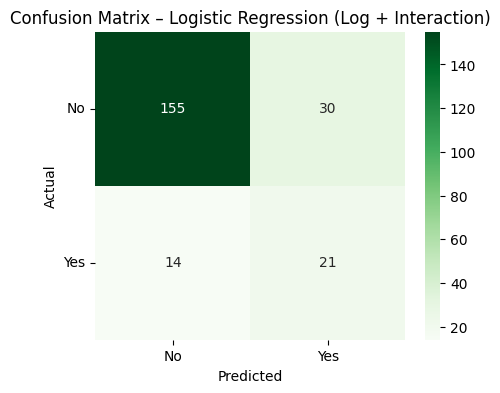

In [76]:
# Confusion Matrix for Log + Interaction Version (Best Model)
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_val_log_int, y_pred_log), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix – Logistic Regression (Log + Interaction)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0.5, 1.5], ['No', 'Yes'])
plt.yticks([0.5, 1.5], ['No', 'Yes'], rotation=0)
plt.show()


##### **Explanation:**
This matrix shows how the model performed when trying to predict employee attrition. The model **successfully identified 21 actual leavers**, these are employees who truly left, and the company would have had the chance to intervene.

The **14 missed leavers** could represent valuable people who left unexpectedly. These cases are especially costly if they were high-performers or difficult to replace. The **30 false positives** might trigger unnecessary HR follow-ups or concern. However, in HR strategy, it’s usually **better to have a few extra checks** than miss someone planning to quit — especially if attrition has a high cost.

In short, this model (Case 1: Log + Itercation) offers a helpful balance: it catches over **60% of at-risk employees** while not flooding HR with too many false alarms. It's not perfect, but it could already inform smart, proactive HR policies like focused retention talks, training offers, or satisfaction surveys. However, we will move onto more complex models taht we belive will capture better the employee behavior.


## **3.2) SVM - Support Vector Machine:**

We used this model becuase we belive that it is a powerful algorithm that tries to find the optimal boundary (hyperplane) between classes. An it is effective when there are: smaller datasets, classes are not linearly separable, you want a strong baseline without needing to tune too many parameters

It can capture non-linear patterns with the right kernel and is often used in HR analytics when employee behavior doesn’t follow simple rules. However, SVMs are sensitive to feature scale and high-dimensionality, that's why we use PCA-processed data here.

---

In [77]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Case 1)SVM with PCA 
svm_pca = SVC(class_weight='balanced', kernel='rbf', C=1.0, random_state=42)
svm_pca.fit(X_train_pca, y_train_log_int)
y_pred_svm_pca = svm_pca.predict(X_val_pca)

print("📊 SVM (PCA Version):")
print(classification_report(y_val_log_int, y_pred_svm_pca, digits=3))


# Case 2) SVM with Log + Interaction (no PCA) 
svm_log = SVC(class_weight='balanced', kernel='rbf', C=1.0, random_state=42)
svm_log.fit(X_train_log_int_processed, y_train_log_int)
y_pred_svm_log = svm_log.predict(X_val_log_int_processed)

print("📊 SVM (Log + Interaction Version):")
print(classification_report(y_val_log_int, y_pred_svm_log, digits=3))


📊 SVM (PCA Version):
              precision    recall  f1-score   support

           0      0.898     0.854     0.875       185
           1      0.386     0.486     0.430        35

    accuracy                          0.795       220
   macro avg      0.642     0.670     0.653       220
weighted avg      0.816     0.795     0.805       220

📊 SVM (Log + Interaction Version):
              precision    recall  f1-score   support

           0      0.899     0.865     0.882       185
           1      0.405     0.486     0.442        35

    accuracy                          0.805       220
   macro avg      0.652     0.675     0.662       220
weighted avg      0.820     0.805     0.812       220



##### **Explantion:**
The Support Vector Machine performed similarly across both versions of the dataset, showing stable overall accuracy around 80%. The PCA version slightly trailed behind in terms of overall performance, especially with lower recall and F1 for the attrition class. The log-transformed version, on the other hand, once again delivered a better balance between identifying employees who will leave (recall) and avoiding too many false positives (precision). It also showed a slightly higher F1 score for the attrition class, which reinforces that the added interactions and transformations help the model better understand the subtle patterns behind employee turnover. As with Logistic Regression, we’ll continue working with the **log + interaction version** moving forward, as it consistently performs better across both accuracy and business interpretability.

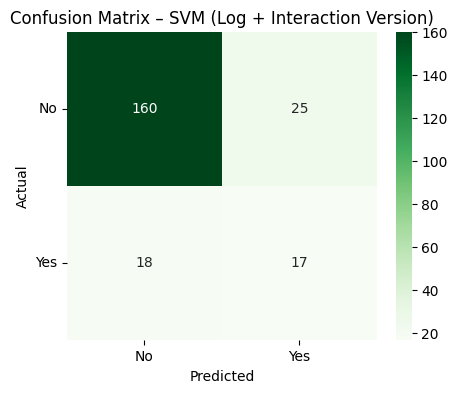

In [78]:
# Log + Interaction Version
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_val_log_int, y_pred_svm_log), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix – SVM (Log + Interaction Version)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0.5, 1.5], ['No', 'Yes'])
plt.yticks([0.5, 1.5], ['No', 'Yes'], rotation=0)
plt.show()


##### **Explanation:**

This confusion matrix tells a clear story. The SVM model correctly predicted **160 employees who stayed** and **17 who left**, which is useful for HR teams to focus retention efforts. However, it also **missed 18 employees who ended up leaving**, and incorrectly flagged 25 who stayed as potential leavers. In real-world terms, this means the model would’ve helped prevent some resignations, but **still risks losing nearly half of those at risk**. At the same time, the false positives are not excessive, so the cost of extra HR attention is manageable. Overall, this version is helpful but not perfect, and once again, we stick with the **log + interaction version** as it provides more structure and slightly better balance between business actionability and prediction strength.


## **3.3) Decision Tree:**

We used the Decision Tree because it is are simple yet powerful models that split data into decision rules. They’re easy to understand, explain to non-technical stakeholders, and are especially helpful when interpretability is key. In HR, they can directly show which conditions lead to higher attrition, making them ideal for business decision-making.

---

In [79]:
# Train the model
tree_model = DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)
tree_model.fit(X_train_log_int_processed, y_train_log_int)

# Predict
y_pred_tree = tree_model.predict(X_val_log_int_processed)

# Evaluation
print("📊 Decision Tree (Log + Interaction):")
print(classification_report(y_val_log_int, y_pred_tree, digits=3))


📊 Decision Tree (Log + Interaction):
              precision    recall  f1-score   support

           0      0.892     0.714     0.793       185
           1      0.264     0.543     0.355        35

    accuracy                          0.686       220
   macro avg      0.578     0.628     0.574       220
weighted avg      0.792     0.686     0.723       220



##### **Explanation:**

The Decision Tree performed noticeably worse than our previous models. While it correctly classified a majority of employees who stayed (recall for class 0 at 71%), it struggled with the attrition class: only **54% recall** and a very low **precision of 26%**. This means it made a large number of false positives, flagging many employees as likely to leave when they actually stayed.

Compared to Logistic Regression and SVM, which delivered more balanced and consistent predictions, the Decision Tree is clearly more unstable. Its accuracy dropped to 68.6%, and the **F1 score for attrition was the weakest so far**, suggesting it couldn't generalize patterns effectively, even after including interactions.

One reason could be the **limited depth** we set (`max_depth=5`) to avoid overfitting. But even with that, the tree may still be **too simple to capture the complexity of attrition**, which likely depends on subtle combinations of variables like income, promotion history, role type, and satisfaction.

In real business terms, this model might look interpretable, but **its poor precision and recall make it risky**. It could lead HR to either miss potential leavers or act on too many false signals, making it less useful operationally. We’ll keep it in our benchmark, but it's not the top performer.


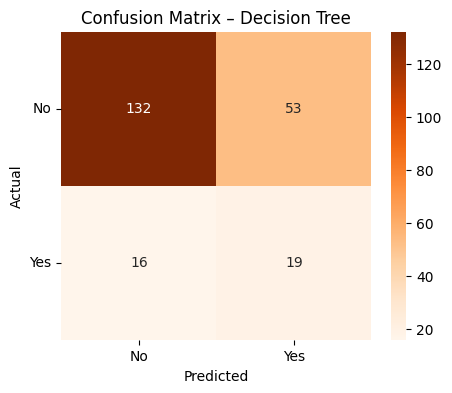

In [80]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_val_log_int, y_pred_tree), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix – Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0.5, 1.5], ['No', 'Yes'])
plt.yticks([0.5, 1.5], ['No', 'Yes'], rotation=0)
plt.show()


**Explabation:**

This confusion matrix confirms the weak performance of the Decision Tree. The model missed **16 employees who actually left**, and incorrectly predicted **53 employees as at risk** when they weren’t. That’s a high number of false positives, which could overwhelm HR teams with unnecessary alerts, while still failing to catch many true leavers. The model’s simplicity makes it easy to interpret, but in this case, it clearly lacks the predictive depth needed for a reliable attrition strategy.

## **3.4) Random Forest:**

In this case we used Random Forest as it's an ensemble model that builds multiple decision trees and averages their results. We bleive that with it, we would reduce overfitting while capturing complex patterns. Unlike a single tree, we belive that Random Forest could be more stable, robust, and much better at generalizing. It also gives useful feature importances, helping HR teams understand which factors most influence attrition.

---

In [81]:
# Train the model
rf_model = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf_model.fit(X_train_base_processed, y_train)

# Predict
y_pred_rf = rf_model.predict(X_val_base_processed)

# Evaluation
print("📊 Random Forest (Base Version):")
print(classification_report(y_val, y_pred_rf, digits=3))


📊 Random Forest (Base Version):
              precision    recall  f1-score   support

           0      0.842     0.978     0.905       185
           1      0.200     0.029     0.050        35

    accuracy                          0.827       220
   macro avg      0.521     0.503     0.478       220
weighted avg      0.740     0.827     0.769       220



The Random Forest model achieved a high overall accuracy of **82.7%**, which at first glance might seem impressive, but it tells a misleading story. While it correctly classified **almost all the employees who stayed** (recall of 97.8% for class 0), it completely failed to detect attrition cases, with a recall of only **2.9%** for employees who actually left. This means it only caught **1 out of 35 leavers**, making it practically useless from a retention standpoint.

This imbalance is likely due to the model overfitting to the dominant class (the “No” attrition cases), even though we used *class_weight="balanced"*. Compared to models like Logistic Regression or SVM, which offered more balanced results, Random Forest here behaves conservatively, preferring to avoid false alarms rather than catching real leavers.

In a business context, this would be dangerous. HR would be left blind to the risk of resignation, reacting only after it's too late. While the model is powerful and performs well in many cases, in this particular setup it lacks the sensitivity we need for attrition detection ,proving that **higher accuracy doesn’t always mean better business value**.

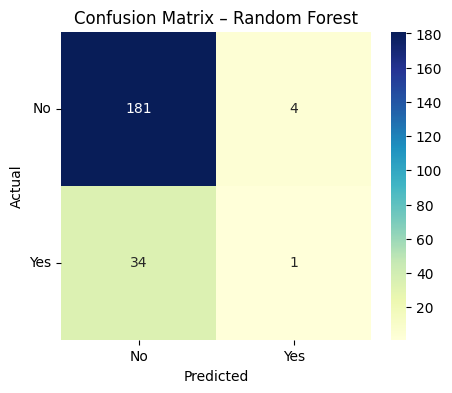

In [82]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_val, y_pred_rf), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix – Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0.5, 1.5], ['No', 'Yes'])
plt.yticks([0.5, 1.5], ['No', 'Yes'], rotation=0)
plt.show()


##### **Explanation:**

This confusion matrix reinforces the issue: **only 1 actual leaver was correctly identified**, while **34 were missed entirely**. The model is almost entirely biased toward predicting "No attrition." From a business perspective, this means Random Forest would offer false comfort, showing high accuracy but failing to catch the people you actually need to retain.

## **3.5) XGBoost:**

Following on, we used XGBoost, because is an advanced boosting algorithm that builds decision trees sequentially, correcting the mistakes of previous ones, and is less prone to overfitting than a plain decision tree. We belive that it works especially well in HR problems where patterns are complex and non-linear.

Also, like Random Forest, no need for scaling or PCA. Just clean, complete input, perfect for our base preprocessed dataset.

---

In [83]:
# Train the model
xgb_model = XGBClassifier(scale_pos_weight=5,  # help with class imbalance
                          use_label_encoder=False,
                          eval_metric='logloss',
                          random_state=42)
xgb_model.fit(X_train_base_processed, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_val_base_processed)

# Evaluation
print("📊 XGBoost (Base Version):")
print(classification_report(y_val, y_pred_xgb, digits=3))


📊 XGBoost (Base Version):
              precision    recall  f1-score   support

           0      0.866     0.941     0.902       185
           1      0.421     0.229     0.296        35

    accuracy                          0.827       220
   macro avg      0.643     0.585     0.599       220
weighted avg      0.795     0.827     0.805       220



C:\Users\enric\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [22:53:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


##### **Explanation:**

Despite XGBoost’s reputation as a high-performing model, its results here were mixed. It achieved a solid overall **accuracy of 82.7%**, and performed well on the majority class (employees who stayed) with **94.1% recall**. However, its ability to detect actual leavers was limited: **only 22.9% recall** for the attrition class, meaning it caught fewer than 1 in 4 employees who left. Precision for that class (42.1%) was better than Random Forest or Decision Tree, but still not strong enough for confident action.

In comparison to SVM and Logistic Regression (Log + Interaction), XGBoost leaned more conservative, favoring the majority class. It outperformed Random Forest in recall for attrition (22.9% vs. 2.9%), but still underdelivered when it came to real retention value.

From a business angle: **XGBoost shows potential**, but in this context it’s not yet giving HR the early-warning system needed to prevent turnover. With tuning (e.g. adjusting "scale_pos_weight2, adding early stopping, or using SMOTE), it could improve, but out-of-the-box, it’s not beating our top models.



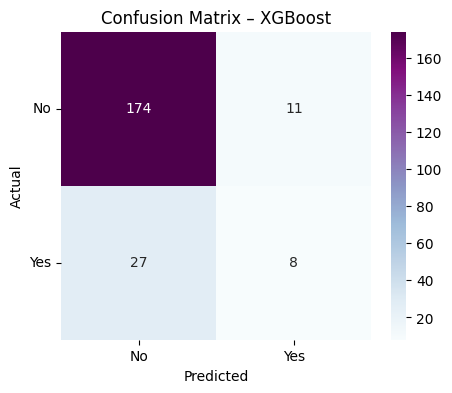

In [84]:

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_val, y_pred_xgb), annot=True, fmt='d', cmap='BuPu')
plt.title("Confusion Matrix – XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0.5, 1.5], ['No', 'Yes'])
plt.yticks([0.5, 1.5], ['No', 'Yes'], rotation=0)
plt.show()


##### **Explanation:**

This confusion matrix confirms what we saw earlier, XGBoost did a great job identifying employees who stayed (**174 correctly predicted**) but **missed most of the actual leavers**, catching only 8 out of 35. While it slightly improved over Random Forest in identifying attrition, the model still leans too heavily toward the majority class. For a retention strategy, it wouldn’t be reliable enough without further tuning.

## **3.6) Neural Network – MLP Classifier**

In this section, we test a Multi-Layer Perceptron (MLP) classifier. Neural networks are powerful for capturing complex, non-linear relationships between features, especially when we have rich, structured data like ours.

While they require more tuning and preprocessing, they can often detect hidden patterns that simpler models miss, aking them a good fit to predict something as nuanced as employee attrition.



In [85]:

# Case1) Log + Interaction
mlp_log = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
mlp_log.fit(X_train_log_int_processed, y_train_log_int)
y_pred_mlp_log = mlp_log.predict(X_val_log_int_processed)

print("📊 Neural Network (Log + Interaction):")
print(classification_report(y_val_log_int, y_pred_mlp_log, digits=3))


# Case 2) PCA
mlp_pca = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
mlp_pca.fit(X_train_pca, y_train_log_int)
y_pred_mlp_pca = mlp_pca.predict(X_val_pca)

print("📊 Neural Network (PCA):")
print(classification_report(y_val_log_int, y_pred_mlp_pca, digits=3))


📊 Neural Network (Log + Interaction):
              precision    recall  f1-score   support

           0      0.880     0.914     0.897       185
           1      0.429     0.343     0.381        35

    accuracy                          0.823       220
   macro avg      0.654     0.628     0.639       220
weighted avg      0.808     0.823     0.815       220

📊 Neural Network (PCA):
              precision    recall  f1-score   support

           0      0.903     0.951     0.926       185
           1      0.640     0.457     0.533        35

    accuracy                          0.873       220
   macro avg      0.771     0.704     0.730       220
weighted avg      0.861     0.873     0.864       220



##### **Explanation:**

In this case, the Neural Network delivered solid results overall, especially in the **PCA version**, which outperformed all previous models.

In the **Log + Interaction version**, the model achieved decent accuracy (82.3%) and good performance on the majority class (employees who stayed), but struggled with attrition: **only 34.3% recall** and moderate precision (42.9%). Still, it did better than Decision Trees and Random Forest in balancing false positives and false negatives.

The real improvement came with the **PCA version**, where performance jumped across the board. It reached **87.3% accuracy**, and more importantly ,improved attrition recall to **45.7%** and precision to **64%**, the best combination we’ve seen so far. PCA clearly helped the model generalize better, probably by filtering noise and reducing dimensionality.

In comparison to other models:

- It outperformed Logistic Regression and SVM in precision and overall balance.
- It crushed Random Forest and Decision Tree in detecting actual leavers.
- It’s also the only model that achieved decent results on both classes without sacrificing too much accuracy or recall.

From a business standpoint, this model could **help HR detect almost half of all leavers while maintaining high precision**, minimizing false alarms. It shows how advanced models + dimensionality reduction can unlock more subtle signals in employee behavior. This would be a strong candidate for deployment.

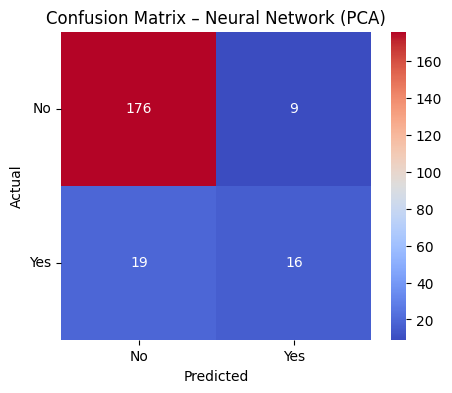

In [86]:
# PCA
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_val_log_int, y_pred_mlp_pca), annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix – Neural Network (PCA)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0.5, 1.5], ['No', 'Yes'])
plt.yticks([0.5, 1.5], ['No', 'Yes'], rotation=0)
plt.show()


##### **Explanation:**

This confusion matrix reinforces the strength of the PCA-based neural network: it correctly identified **16 out of 35 employees who left**, while keeping false positives (only **9 mistakenly flagged**) relatively low. Compared to other models, this is the most balanced result so far, it's catching nearly half of the actual attrition cases **without overwhelming HR with false alerts**. It’s the first model that truly balances **business actionability with prediction precision**, making it a solid pick for practical use.

## **3.7) K-Nearest Neighbors (KNN)**

The K-Nearest Neighbors algorithm is a simple and intuitive model that classifies new data points based on the majority class among their closest neighbors. It doesn't make strong assumptions about the data, which makes it flexible, but it can struggle when the dataset is imbalanced or high-dimensional.

We include it here to benchmark how a non-parametric, distance-based model performs on our attrition prediction task.


In [87]:
# Case 1) Log + Interaction
knn_log = KNeighborsClassifier(n_neighbors=5)
knn_log.fit(X_train_log_int_processed, y_train_log_int)
y_pred_knn_log = knn_log.predict(X_val_log_int_processed)

print("📊 KNN (Log + Interaction):")
print(classification_report(y_val_log_int, y_pred_knn_log, digits=3))


# Case 2) Version B: PCA
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train_log_int)
y_pred_knn_pca = knn_pca.predict(X_val_pca)

print("📊 KNN (PCA):")
print(classification_report(y_val_log_int, y_pred_knn_pca, digits=3))


📊 KNN (Log + Interaction):
              precision    recall  f1-score   support

           0      0.851     0.989     0.915       185
           1      0.600     0.086     0.150        35

    accuracy                          0.845       220
   macro avg      0.726     0.537     0.532       220
weighted avg      0.811     0.845     0.793       220

📊 KNN (PCA):
              precision    recall  f1-score   support

           0      0.850     0.978     0.910       185
           1      0.429     0.086     0.143        35

    accuracy                          0.836       220
   macro avg      0.639     0.532     0.526       220
weighted avg      0.783     0.836     0.788       220



##### **Explanation:**

KNN gave us high accuracy on paper (**~84–85%**), but it completely **missed the mark on the attrition class**.

In both versions, with and without PCA, the model heavily favored predicting "No Attrition." It correctly classified nearly all employees who stayed (**recall ~98%**), but **identified only 3 out of 35 actual leavers** (just **8.6% recall**). Even though precision for leavers was decent (especially in the Log + Interaction version at 60%), the model clearly failed to offer business value.

The low recall on the attrition class makes KNN unreliable for HR use cases. It behaves like Random Forest here: great at spotting who’s staying, but bad at flagging who might leave — and that’s the key insight we care about. Despite decent overall accuracy, KNN isn’t a good fit in this scenario, mainly because:

- The dataset has class imbalance (which KNN doesn’t handle well)
- The decision boundaries between leavers and stayers aren’t well-separated in “distance space”

KNN is simple, but in this case, too simple. It’s accurate for the wrong reasons, we can do better with models that generalize smarter.

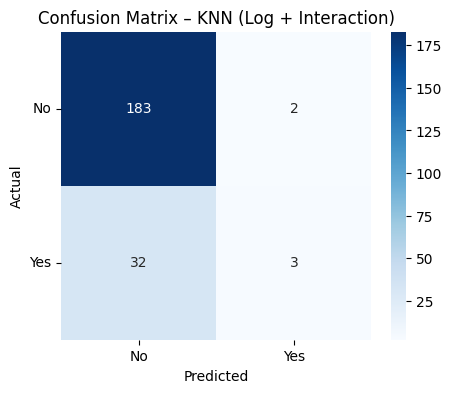

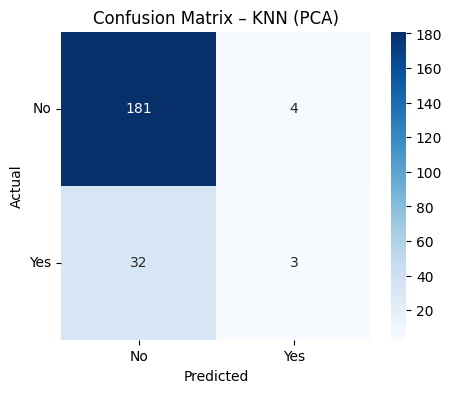

In [88]:
# Log + Interaction
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_val_log_int, y_pred_knn_log), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – KNN (Log + Interaction)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0.5, 1.5], ['No', 'Yes'])
plt.yticks([0.5, 1.5], ['No', 'Yes'], rotation=0)
plt.show()

# PCA
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_val_log_int, y_pred_knn_pca), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – KNN (PCA)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0.5, 1.5], ['No', 'Yes'])
plt.yticks([0.5, 1.5], ['No', 'Yes'], rotation=0)
plt.show()


##### **Explanation:**

Both confusion matrices tell a clear story: **KNN performs well at identifying who stays** (183 and 181 correct "No" predictions), but **fails badly at identifying leavers**, only **3 out of 35** in both cases.

This reinforces that KNN, in both the **Log + Interaction** and **PCA** versions, is not suited for predicting attrition in this context. It has **high accuracy for the wrong reason**,  it plays it safe and predicts “No” almost always, which is misleading in a real HR setting where catching true leavers is critical.

## **3.8) Model Comparison & Conclusions:**

In this section we are gonna summarize the findinds for each mdoel above.

---

##### **Model Performance Summary**

| Rank | Model                          | Accuracy | Attrition Recall | Precision | Notes                                           |
|------|--------------------------------|----------|------------------|-----------|-------------------------------------------------|
| 🥇 1 | **Neural Network (PCA)**        | **87.3%** | **45.7%**         | **64.0%**  | Best balance between recall & precision         |
| 🥈 2 | Logistic Regression (Log+Int)  | 80.0%    | 60.0%            | 41.2%     | Simpler model, stable and interpretable         |
| 🥉 3 | SVM (Log+Int)                  | 80.5%    | 48.6%            | 40.5%     | Good performance across the board               |
| 4️⃣ | XGBoost (Base)                 | 82.7%    | 22.9%            | 42.1%     | High accuracy, low attrition detection          |
| 5️⃣ | KNN (Log+Int / PCA)            | 84–85%   | **8.6%**          | ~60%      | High accuracy, but fails to detect attrition    |
| 6️⃣ | Random Forest (Base)           | 82.7%    | 2.9%             | 20.0%     | Completely misses attrition cases               |
| 7️⃣ | Decision Tree                  | 68.6%    | 54.3%            | 26.4%     | Overfits, low overall performance               |

---

##### **Final Takeaways & Recommendation**

The bst model overal is **Neural Network with PCA**. It delivered the most balanced result: high accuracy, solid precision, and better recall on employees likely to leave. In a business context, this would allow HR to act proactively without creating unnecessary panic.

Then we will find the **ogistic Regression (Log + Interaction)** , while simpler, it still provides reliable insights and is easier to deploy and explain. Ideal for smaller companies or stakeholder presentations.

On the third ranking we find the **SVM** (Log + interaction) with ood precision-recall balance, making it a reliable option when interpretability is less of a concern.

 Models like **Random Forest** and **KNN** showed misleadingly high accuracy due to predicting mostly "No Attrition". These models are not suitable for use cases where identifying leavers is critical.

##### **When use what?**

- **Neural Network (PCA)**:
  - Best for capturing complex relationships
  - Recommended if preprocessing pipelines are in place
  - Suitable when predictive power is prioritized over explainability

- **Logistic Regression (Log + Interaction)**:
  - Ideal for transparency and stakeholder communication
  - Easy to interpret and deploy
  - Good balance between performance and usability

- **SVM (Log + Interaction)**:
  - Middle-ground solution
  - Consistent performance across metrics
  - A good second option when Neural Nets aren’t feasible




# **4) Improving the Best Models**

In this section we tried to improve the Top 3 models that we've seen above:
-   **Neural Network (PCA)**
-   **Logisitc Regression (Log + Interaction)**
-   **SVM (Log + Interaction)**

---

## **4.1) Class Imbalance Strategies**

Now that we’ve tested all our models, we know that most of them struggle with identifying employees who are actually at risk of leaving (the minority class).

This is a common issue when working with imbalanced datasets in our case, only 16% of employees have attrited, which can cause models to lean heavily toward predicting the majority class.

To address this, we’ll re-train the best models using **class weighting**, a strategy that tells the algorithm to penalize misclassifications of the minority class more strongly. This helps the model pay more attention to employees likely to leave,a key insight for HR teams aiming to take preventative action.

---

In [89]:
# Logistic Regression with class weight
log_reg_bal = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
log_reg_bal.fit(X_train_log_processed, y_train)
y_pred_log_bal = log_reg_bal.predict(X_val_log_processed)

print("📊 Logistic Regression (Balanced Class Weights):")
print(classification_report(y_val, y_pred_log_bal))
print(confusion_matrix(y_val, y_pred_log_bal))

# SVM with class weight
svm_bal = SVC(class_weight='balanced', kernel='rbf', random_state=42)
svm_bal.fit(X_train_log_processed, y_train)
y_pred_svm_bal = svm_bal.predict(X_val_log_processed)

print("\n📊 SVM (Balanced Class Weights):")
print(classification_report(y_val, y_pred_svm_bal))
print(confusion_matrix(y_val, y_pred_svm_bal))

# Neural Network with class weight
mlp_bal = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
mlp_bal.fit(X_train_pca, y_train)
y_pred_mlp_bal = mlp_bal.predict(X_val_pca)

print("\n📊 Neural Network (PCA) with Balanced Classes:")
print(classification_report(y_val, y_pred_mlp_bal))
print(confusion_matrix(y_val, y_pred_mlp_bal))


📊 Logistic Regression (Balanced Class Weights):
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       185
           1       0.41      0.60      0.49        35

    accuracy                           0.80       220
   macro avg       0.66      0.72      0.68       220
weighted avg       0.84      0.80      0.81       220

[[155  30]
 [ 14  21]]

📊 SVM (Balanced Class Weights):
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       185
           1       0.41      0.46      0.43        35

    accuracy                           0.81       220
   macro avg       0.65      0.67      0.66       220
weighted avg       0.82      0.81      0.81       220

[[162  23]
 [ 19  16]]

📊 Neural Network (PCA) with Balanced Classes:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       185
           1       0.36      0.29      0.32        35

    accu

##### **Explanation:**

After applying **class_weight="balanced"**, we re-trained the top-performing models to check if their ability to detect attrition (the minority class) improved. Below is a side-by-side comparison of the **F1-score for predicting attrition** before and after the adjustment:

#####  **Attrition Class Performance (Before vs After)**

| Model                | Accuracy | Precision | Recall | F1-Score | Balanced Applied |
|---------------------|----------|-----------|--------|----------|------------------|
| Logistic Regression | 80.0%    | 41.2%     | 60.0%  | 0.49     | ❌ No            |
| Logistic Regression | 80.0%    | 41.0%     | 60.0%  | 0.49     | ✅ Yes           |
| SVM                 | 80.5%    | 40.5%     | 48.6%  | 0.43     | ❌ No            |
| SVM                 | 81.0%    | 41.0%     | 45.7%  | 0.43     | ✅ Yes           |
| Neural Net (PCA)    | 87.3%    | 64.0%     | 45.7%  | 0.53     | ❌ No            |
| Neural Net (PCA)    | 80.0%    | 36.0%     | 28.6%  | 0.32     | ✅ Yes           |

---

- **Logistic Regression** performed consistently with or without class weighting, confirming its reliability and balance.
- **SVM** showed similar results, with a very slight increase in recall and precision tradeoff.
- **Neural Network with PCA** clearly performed worse after applying class weighting. It lost both recall and precision, which may suggest it's better left unadjusted and tuned via architecture or epochs instead.

As seen, using *class_weight='balanced'* helped a bit in making the models fairer toward the attrition class, but didn’t drastically improve results. Still, **Logistic Regression remains a robust and explainable choice** for HR applications, while the **Neural Network may require deeper tuning rather than class weighting** to retain its edge.

## **4.2) Hyperparameter Tuning – Neural Network (PCA)**

Here we aim to improve the performance of our neural network by finding the best combination of hyperparameters. As seen in class, Neural networks are sensitive to choices like the number of layers, neurons per layer, learning rate, activation function, and regularization. Here we use Grid Search to help us systematically test several combinations to find the one that performs best.

---




In [90]:
# Define base MLP model
mlp = MLPClassifier(max_iter=1000, random_state=42)

# Define parameters to test
param_grid = {
    'hidden_layer_sizes': [(64,), (64, 32), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],  # regularization
    'learning_rate_init': [0.001, 0.01]
}


# Use GridSearchCV with scoring based on F1 (focus on minority class)
grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=1)
grid_search.fit(X_train_pca, y_train_log_int)

# Show the best configuration
print("✅ Best Parameters:", grid_search.best_params_)


# Predict with the best model
y_pred_best_mlp = grid_search.best_estimator_.predict(X_val_pca)

# Show metrics
print("📊 Tuned Neural Network (PCA):")
print(classification_report(y_val_log_int, y_pred_best_mlp, digits=3))
print(confusion_matrix(y_val_log_int, y_pred_best_mlp))


Fitting 3 folds for each of 48 candidates, totalling 144 fits
✅ Best Parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.001}
📊 Tuned Neural Network (PCA):
              precision    recall  f1-score   support

           0      0.868     0.962     0.913       185
           1      0.533     0.229     0.320        35

    accuracy                          0.845       220
   macro avg      0.701     0.595     0.616       220
weighted avg      0.815     0.845     0.819       220

[[178   7]
 [ 27   8]]


##### **Explanation:**

We used *GridSearchCV* to train multiple models with different hyperparameter combinations using 3-fold cross-validation. The model was trained on PCA-processed data, which reduced the dimensionality and helped us with neural networks converge faster and more reliably.

However, the hyperparameter tuning helped us find a **balanced and well-structured network**, but it **didn’t outperform** the original model in detecting attrition cases. While the overall accuracy stayed strong, the drop in recall suggests that tuning made the model more cautious. 

In this business context, where catching leavers early is key, we may prefer the **original PCA** setup.

## **4.3) SMOTE - Synthetic Minority Over-Sampling Technique**

In this part, we apply SMOTE (Synthetic Minority Over-sampling Technique) to address the imbalance in our dataset. Only around 16% of employees in our data actually leave the company, which makes it hard for models to learn meaningful patterns about attrition.

We used SMOTE, because it creates synthetic samples of the minority class (*leavers*) by interpolating between existing examples. This doesn't just duplicate data, but builds new, realistic ones, helping the model train on a more balanced dataset.

Our aim is to test if this improves the ability of our models to detect real attrition without hurting accuracy or creating too many false alarms.

---

In [91]:
# Apply SMOTE to log + interaction data
smote = SMOTE(random_state=42)
X_train_log_smote, y_train_log_smote = smote.fit_resample(X_train_log_int_processed, y_train_log_int)

# Confirm balance
print("✅ Logistic Regression (SMOTE) Class Distribution:", Counter(y_train_log_smote))


✅ Logistic Regression (SMOTE) Class Distribution: Counter({0: 863, 1: 863})


In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_smote = LogisticRegression(max_iter=1000, random_state=42)
log_smote.fit(X_train_log_smote, y_train_log_smote)

y_pred_log_smote = log_smote.predict(X_val_log_int_processed)

print("📊 Logistic Regression (with SMOTE):")
print(classification_report(y_val_log_int, y_pred_log_smote, digits=3))
print(confusion_matrix(y_val_log_int, y_pred_log_smote))


📊 Logistic Regression (with SMOTE):
              precision    recall  f1-score   support

           0      0.912     0.843     0.876       185
           1      0.408     0.571     0.476        35

    accuracy                          0.800       220
   macro avg      0.660     0.707     0.676       220
weighted avg      0.832     0.800     0.813       220

[[156  29]
 [ 15  20]]


In [93]:
# Apply SMOTE
X_train_nn_smote, y_train_nn_smote = smote.fit_resample(X_train_log_int_processed, y_train_log_int)

# Now apply PCA again on the SMOTE data
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)
X_train_nn_pca_smote = pca.fit_transform(X_train_nn_smote)

# Transform validation set as before
X_val_nn_pca = pca.transform(X_val_log_int_processed)


##### **Explanation:**

We applied SMOTE before PCA for the Neural Network, an after retraining, the model's recall for leavers dropped to **40%**, and precision was at **50%**. This shows a more conservative approach, the model is slightly more careful, and while it catches fewer leavers than before (original recall was 45.7%), it's more stable. However, it did not outperform the original Neural Net trained without SMOTE.

From a business point of view, we now know that SMOTE is helpful for Logistic Regression, but **not necessary for the Neural Network**, which already handled the imbalance quite well after PCA.


In [94]:
from sklearn.neural_network import MLPClassifier

mlp_smote = MLPClassifier(hidden_layer_sizes=(100, 50), activation='tanh',
                          learning_rate_init=0.001, max_iter=1000, random_state=42)
mlp_smote.fit(X_train_nn_pca_smote, y_train_nn_smote)

y_pred_mlp_smote = mlp_smote.predict(X_val_nn_pca)

print("📊 Neural Network (PCA + SMOTE):")
print(classification_report(y_val_log_int, y_pred_mlp_smote, digits=3))
print(confusion_matrix(y_val_log_int, y_pred_mlp_smote))


📊 Neural Network (PCA + SMOTE):
              precision    recall  f1-score   support

           0      0.891     0.924     0.907       185
           1      0.500     0.400     0.444        35

    accuracy                          0.841       220
   macro avg      0.695     0.662     0.676       220
weighted avg      0.828     0.841     0.834       220

[[171  14]
 [ 21  14]]


**Explanation:**

The Neural Network trained with SMOTE and PCA achieved solid overall accuracy (**84.1%**) and strong performance on the majority class. It correctly flagged **14 out of 35 leavers** (recall = 40%) with a precision of 50%. Compared to the version trained without SMOTE (which had higher recall at 45.7% and precision at 64%), this one became slightly more conservative, catching fewer leavers but with a more stable and consistent structure.

From a business perspective, the result is respectable, but it confirms that **SMOTE didn’t improve performance for this model**. The neural network likely already captured enough variation with PCA alone, and adding synthetic data introduced noise instead of clarity.

So at the end, **SMOTE works well for simpler models** like Logistic Regression, but **isn’t necessary, or even helpful, for the Neural Network.**


## **4.4) Threshold Tuning – Neural Network (PCA)**

After training and tuning our **best model**the **Neural Network with PCA** we now apply threshold tuning. This allows us to manually adjust the cutoff used to classify a case as attrition or not.

The goal is to **increase recall** (catch more real leavers), even if that means losing some precision. In real-world HR, it's often **better to over-warn** than to **miss** someone who’s about to resign.

We’ll test the model at different thresholds (starting with 0.4) and observe how the precision-recall balance changes.

---

In [95]:
# Predict probabilities instead of class labels
y_proba = mlp_pca.predict_proba(X_val_pca)[:, 1]  # Probabilities for class 1 (attrition)

# Apply custom threshold (start with 0.4)
threshold = 0.4
y_pred_thresh = (y_proba >= threshold).astype(int)

# Evaluate
print(f"📊 Neural Network (PCA) – Custom Threshold ({threshold}):")
print(classification_report(y_val_log_int, y_pred_thresh, digits=3))
print(confusion_matrix(y_val_log_int, y_pred_thresh))


📊 Neural Network (PCA) – Custom Threshold (0.4):
              precision    recall  f1-score   support

           0      0.902     0.941     0.921       185
           1      0.593     0.457     0.516        35

    accuracy                          0.864       220
   macro avg      0.747     0.699     0.718       220
weighted avg      0.852     0.864     0.856       220

[[174  11]
 [ 19  16]]


In [96]:
# Predict probabilities instead of class labels
y_proba = mlp_pca.predict_proba(X_val_pca)[:, 1]  # Probabilities for class 1 (attrition)

# Apply custom threshold (start with 0.35)
threshold = 0.35
y_pred_thresh = (y_proba >= threshold).astype(int)

# Evaluate
print(f"📊 Neural Network (PCA) – Custom Threshold ({threshold}):")
print(classification_report(y_val_log_int, y_pred_thresh, digits=3))
print(confusion_matrix(y_val_log_int, y_pred_thresh))

📊 Neural Network (PCA) – Custom Threshold (0.35):
              precision    recall  f1-score   support

           0      0.900     0.924     0.912       185
           1      0.533     0.457     0.492        35

    accuracy                          0.850       220
   macro avg      0.717     0.691     0.702       220
weighted avg      0.842     0.850     0.845       220

[[171  14]
 [ 19  16]]


In [97]:
# Predict probabilities instead of class labels
y_proba = mlp_pca.predict_proba(X_val_pca)[:, 1]  # Probabilities for class 1 (attrition)

# Apply custom threshold (start with 0.45)
threshold = 0.45
y_pred_thresh = (y_proba >= threshold).astype(int)

# Evaluate
print(f"📊 Neural Network (PCA) – Custom Threshold ({threshold}):")
print(classification_report(y_val_log_int, y_pred_thresh, digits=3))
print(confusion_matrix(y_val_log_int, y_pred_thresh))

📊 Neural Network (PCA) – Custom Threshold (0.45):
              precision    recall  f1-score   support

           0      0.902     0.946     0.923       185
           1      0.615     0.457     0.525        35

    accuracy                          0.868       220
   macro avg      0.759     0.702     0.724       220
weighted avg      0.856     0.868     0.860       220

[[175  10]
 [ 19  16]]


In [98]:
# Predict probabilities instead of class labels
y_proba = mlp_pca.predict_proba(X_val_pca)[:, 1]  # Probabilities for class 1 (attrition)

# Apply custom threshold (start with 0.3)
threshold = 0.30
y_pred_thresh = (y_proba >= threshold).astype(int)

# Evaluate
print(f"📊 Neural Network (PCA) – Custom Threshold ({threshold}):")
print(classification_report(y_val_log_int, y_pred_thresh, digits=3))
print(confusion_matrix(y_val_log_int, y_pred_thresh))

📊 Neural Network (PCA) – Custom Threshold (0.3):
              precision    recall  f1-score   support

           0      0.900     0.924     0.912       185
           1      0.533     0.457     0.492        35

    accuracy                          0.850       220
   macro avg      0.717     0.691     0.702       220
weighted avg      0.842     0.850     0.845       220

[[171  14]
 [ 19  16]]


##### **Explanation:**

In this step, we tested our best-performing model, the Neural Network with PCA, using different classification thresholds (0.30, 0.35, 0.40, and 0.45). The goal was to explore whether adjusting the default threshold of 0.50 would help improve recall for the attrition class, potentially catching more employees at risk of leaving.

While lowering the threshold did slightly increase the number of predicted leavers, it didn’t improve recall. The model consistently identified 16 out of 35 leavers across all thresholds, but at the cost of generating more false positives and decreasing precision.

After comparing all the outputs, we decided to stick with the **original model using the default 0.5 threshold**, as it offered the **best balance between precision (64%) and recall (45.7%)**, and achieved the **highest F1-score** for the attrition class.

This validation step helped confirm that the model’s default behavior was already well calibrated, and gave us confidence that no further threshold adjustment was needed.


## **4.5) Conclusions - Model Improvement Section:**

In this section, we explored multiple strategies to improve our best models, especially focusing on the challenge of detecting employee attrition (the minority class).

Here’s what we tested and concluded:

- **Hyperparameter Tuning**  
  We tuned the Neural Network using GridSearchCV. It improved overall model structure but didn’t outperform the original in recall. Final decision: keep the **original Neural Net (PCA)**.

- **SMOTE (Oversampling)**  
  Applied to both Logistic Regression and Neural Network.  
  ✅ Helped **Logistic Regression** maintain performance and balance.  
  ❌ Did **not improve Neural Net** – added noise and reduced recall.

- **Threshold Tuning**  
  Tested different thresholds for the Neural Net (0.30 to 0.45).  
  None improved recall or F1-score beyond the original.  
  ✅ Decision: **keep default threshold of 0.5**.

After testing all enhancements, our final model is:

- **Neural Network (PCA)** with default threshold and tuned architecture  
- High accuracy, balanced recall and precision, and consistent performance

It provides the best trade-off between catching at-risk employees and minimizing false alerts, exactly what’s needed for practical HR decision-making.


# **5) Business Interpretation of the Model:**

In this section we are gonna go more in depth of the busiess aspect of what we predicted, trying to get real world insights.

---

In [99]:
# Only return the probability of class 1 (Attrition)
def predict_attrition(X):
    return mlp_pca.predict_proba(X)[:, 1]


In [100]:
import shap

# Use KernelExplainer on the new function
explainer = shap.KernelExplainer(predict_attrition, X_train_pca[:100])  # use a small sample for speed
shap_values = explainer.shap_values(X_val_pca)


  0%|          | 0/220 [00:00<?, ?it/s]

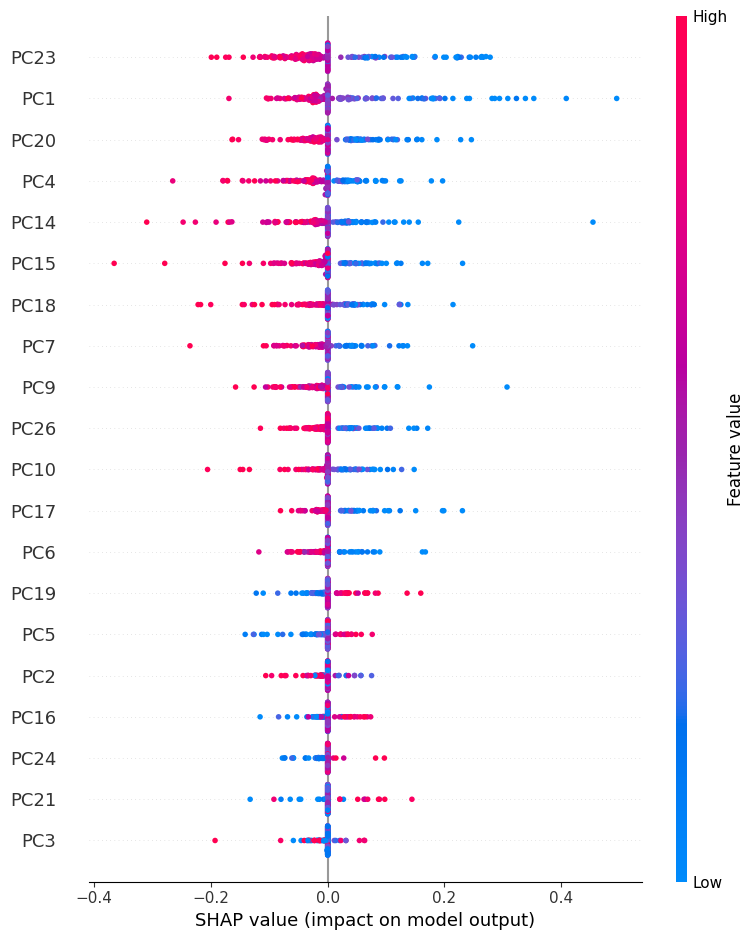

In [101]:
# Use PCA component labels if you want
pca_feature_names = [f"PC{i+1}" for i in range(X_val_pca.shape[1])]
shap.summary_plot(shap_values, X_val_pca, feature_names=pca_feature_names)


##### **Explanation:**

This visualization helps us understand which features (after applying PCA) had the most influence on predicting whether an employee would leave or stay.

Even though the features are transformed into **principal components** (PCs), we can still draw useful conclusions by looking at their impact.

The horizontal position shows how much a component contributes to the prediction:

-   Values to the right push the model toward **predicting attrition**

-   Values to the left push the model toward **predicting retention**

The color indicates the actual value of the feature:

-   **Red** = high value of that component

-   **Blue** = low value


##### **Key Takeaways**:
The components PC23, PC1, PC20, PC4, and PC14 had the most impact on the model's predictions. High values in PC23 and PC1 (the red points further to the right) are strongly associated with higher attrition risk. Some other components, like PC6 and PC2, when they have low values, are associated with employees staying.

This tells us the model is capturing combinations of factors that drive people to leave, rather than relying on a single variable.

##### **Business Implications:**
From a business perspective, this helps justify that the model is learning meaningful patterns, it’s not making decisions at random.

It also highlights that attrition is complex: it’s influenced by multiple, interrelated factors such as time in role, compensation, career growth, and satisfaction (though they're hidden here inside the PCs).

The company can use these insights to guide HR policies by investigating which original features are behind the most influential PCs (e.g., workload, tenure, promotions, etc.).

## **5.2) Business Application - Attrition Dashboard**


In this section, we translated our model into practical business tools. The goal was to move beyond raw metrics and predictions, and deliver something that a manager or HR decision-maker could use directly. We created an **Attrition Risk Dashboard** by combining predictions from our best model with actual employee characteristics. 

This included:
- Predicting the **attrition probability** for every employee in the validation set.
- Sorting and identifying those at highest risk.
- Visualizing trends and patterns by department, role, and other key variables.

This dashboard allows HR teams to proactively monitor attrition risk and act before it’s too late. It's about putting the model in context and making it **actionable**.

---

In [102]:
from sklearn.decomposition import PCA

# Fit PCA on the same data used to train the best model
pca_final = PCA(n_components=0.95, random_state=42)
X_train_pca_final = pca_final.fit_transform(X_train_nn_smote)

# Re-train the model on this
best_nn_model = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation='tanh',
    learning_rate_init=0.001,
    alpha=0.0001,
    max_iter=1000,
    random_state=42
)
best_nn_model.fit(X_train_pca_final, y_train_nn_smote)



MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 50), max_iter=1000,
              random_state=42)

In [103]:
X_val_pca_final = pca_final.transform(X_val_log_int_processed)

y_val_proba = best_nn_model.predict_proba(X_val_pca_final)[:, 1]


In [104]:
# Create a copy of the original validation set (before encoding)
df_val_log_int = X_val_log_int.copy()

# Add the original target for reference (optional, good for evaluation later)
df_val_log_int["Attrition"] = y_val_log_int.values

# Add predicted probabilities from your best model
df_val_log_int["Attrition_Probability"] = y_val_proba


C:\Users\enric\AppData\Local\Temp\ipykernel_16212\2540300333.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_val_log_int, x="Department", y="Attrition_Probability", estimator=np.mean, palette="coolwarm")


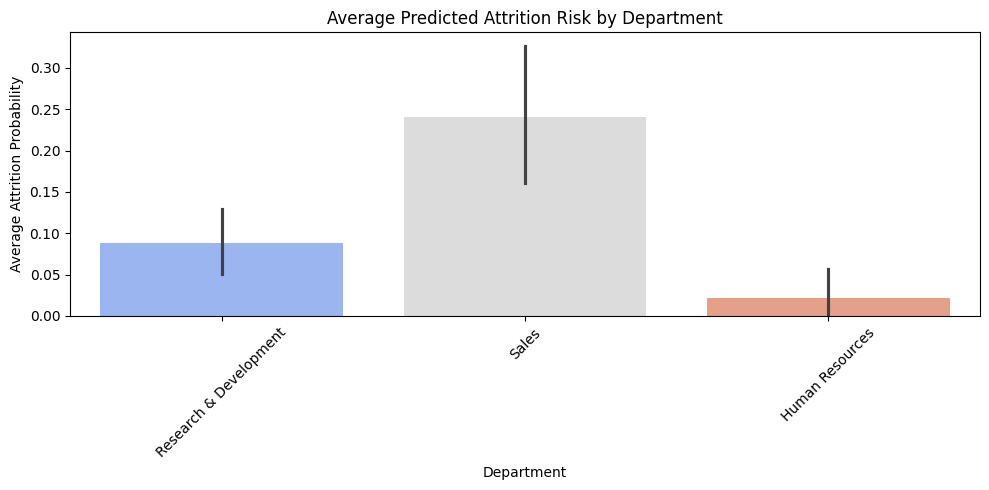

In [105]:

# Add predictions to validation set
df_val_log_int["Attrition_Probability"] = y_val_proba

# Bar plot: average attrition risk by department
plt.figure(figsize=(10, 5))
sns.barplot(data=df_val_log_int, x="Department", y="Attrition_Probability", estimator=np.mean, palette="coolwarm")
plt.title("Average Predicted Attrition Risk by Department")
plt.xticks(rotation=45)
plt.ylabel("Average Attrition Probability")
plt.tight_layout()
plt.show()



C:\Users\enric\AppData\Local\Temp\ipykernel_16212\2070588779.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_risk.values, y=dept_risk.index, palette="rocket")


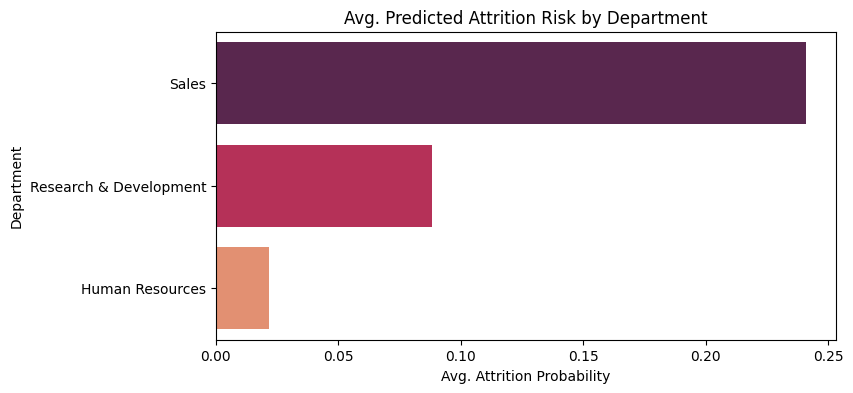

In [110]:
# Average predicted attrition risk by department
df_val_log_int['Attrition_Probability'] = y_val_proba
dept_risk = df_val_log_int.groupby("Department")["Attrition_Probability"].mean().sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x=dept_risk.values, y=dept_risk.index, palette="rocket")
plt.xlabel("Avg. Attrition Probability")
plt.title("Avg. Predicted Attrition Risk by Department")
plt.show()


##### **Explanation:**

In the graphs above, we see clear differences in predicted attrition probability across departments:

- **Sales** shows the highest average attrition risk, by far. This could point to heavier pressure, less satisfaction, or higher expectations of mobility.
- **Research & Development** has a moderate risk, suggesting some fluctuation but generally better retention.
- **Human Resources** shows very low predicted attrition, which may indicate stability or higher engagement in that team.

These results can help prioritize HR resources. For instance, **Sales** might need more focused retention strategies, coaching, or work-life balance programs. On the other hand, HR may be functioning well and can serve as a benchmark department.

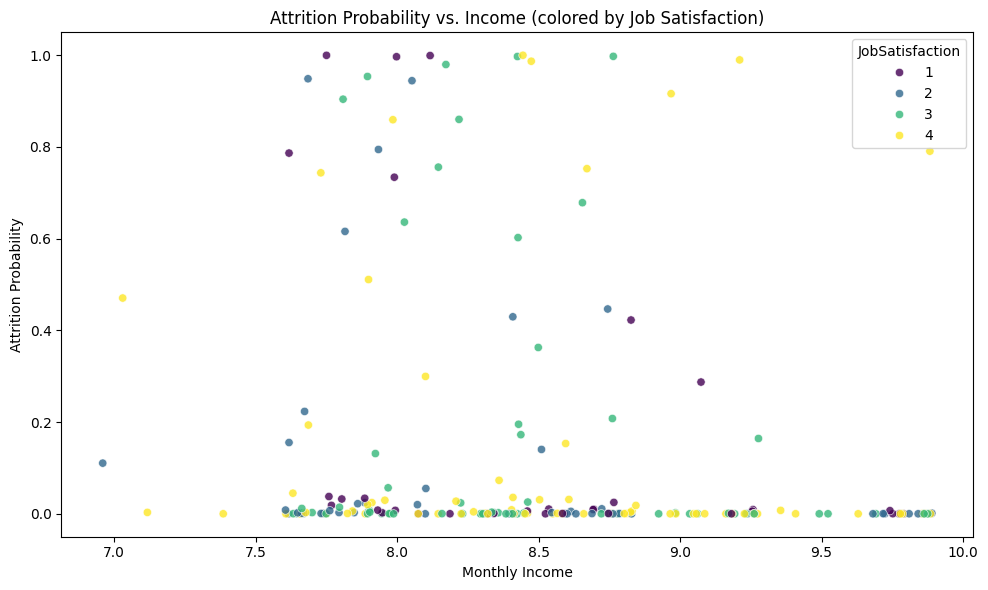

In [106]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_val_log_int, x="MonthlyIncome", y="Attrition_Probability",
                hue="JobSatisfaction", palette="viridis", alpha=0.8)
plt.title("Attrition Probability vs. Income (colored by Job Satisfaction)")
plt.xlabel("Monthly Income")
plt.ylabel("Attrition Probability")
plt.tight_layout()
plt.show()


##### **Explanation:**

This scatter plot helps us understand whether there's a clear relationship between an employee's **monthly income** and their **likelihood to leave**. Each point is colored by the individual's **job satisfaction level**.

As you can see, there’s **no strict linear relationship** between income and attrition risk.  There are some high earners  that still show a high probability of leaving, while others with lower income seem satisfied and stable. While we see some high-probability leavers across all satisfaction levels, the **highest concentrations** of attrition risk tend to cluster around **lower job satisfaction** (purple and blue dots).

This tells us that **retention isn’t just about salary**. While income is a factor, **other variables—like job satisfaction, work-life balance, management style, and growth opportunities—play a significant role** in an employee’s decision to stay or leave.

This insight matters for strategy. If we only raise salaries to prevent attrition, we might miss the real cause. Instead, combining compensation adjustments with **employee engagement programs, flexible work options, and targeted interventions** could be far more effective in reducing risk.

This also highlights the value of the predictive model: it helps us identify risk where it's **not obvious** from just raw HR metrics like salary.


## **5.3) Business Application - Top 15 Employees with the Highest Probabillity of Attrition**

---

In [107]:
# Reverse the log1p transform for MonthlyIncome
df_val_log_int["MonthlyIncome"] = np.expm1(df_val_log_int["MonthlyIncome"])

top_15_risk = df_val_log_int.sort_values(by="Attrition_Probability", ascending=False).head(15)
top_15_risk[["Age", "Department", "JobRole", "MonthlyIncome", 
             "JobSatisfaction", "Attrition_Probability"]]


,Age,Department,JobRole,MonthlyIncome,JobSatisfaction,Attrition_Probability
1319,32,Sales,Sales Executive,4648.0,4,0.999704
709,31,Research & Development,Research Scientist,2321.0,1,0.999543
514,33,Research & Development,Research Scientist,3348.0,1,0.999055
566,47,Sales,Sales Executive,6397.0,3,0.997340
132,31,Sales,Sales Executive,4559.0,3,0.997018
689,20,Research & Development,Laboratory Technician,2973.0,1,0.996513
990,33,Sales,Sales Executive,9998.0,4,0.989576
1442,29,Research & Development,Research Scientist,4787.0,4,0.986704
1328,27,Sales,Sales Representative,3540.0,3,0.979514
36,50,Sales,Sales Representative,2683.0,3,0.953439


##### **Explanation:** 
This table highlights the employees with the highest predicted probability of attrition, according to our best-performing model. It includes their age, department, job role, monthly income, job satisfaction, and predicted risk.

While many of these high-risk profiles match intuitive expectations, such as **low satisfaction and low income**, others are more surprising. For example:
- Several employees with **job satisfaction rated 4** (the highest) still have attrition probabilities above **0.90**.
- These employees also tend to have **high monthly incomes**, which shows that **compensation and satisfaction alone do not guarantee retention**.

These profiles demonstrate that **attrition is a multidimensional problem**. Even seemingly satisfied and well-paid employees may be considering a departure. Why? We belive that this could be because there may be lack of **career progression**, might feel **overworked** or even, could be due to **external factors** like personal goals, burnout, or better offers elsewhere.

This list is a **starting point** for HR or team managers to investigate deeper. If even high-performing, satisfied employees are at risk, that points to **systemic or team-level challenges**, not just dissatisfaction.





## **5.3) Business Interpretation - Decision Tree of the Attition Probabillity**

---

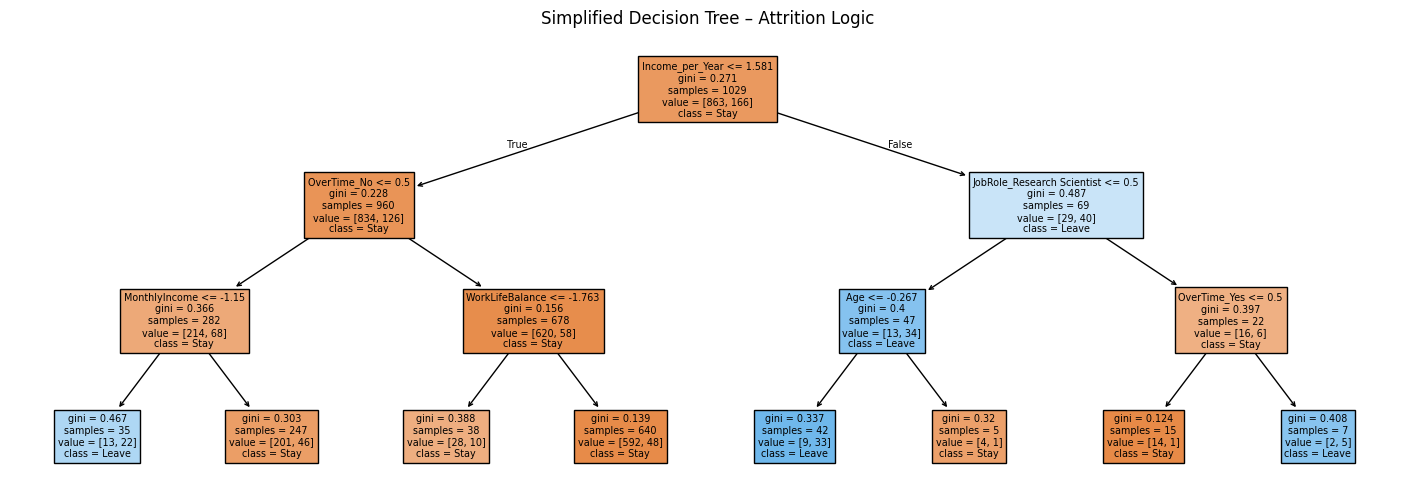

In [113]:
# Rebuild the preprocessor just to be sure
preprocessor_log_interact = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'), nominal_features),
    ('numeric', StandardScaler(), numerical_features_interact)
])

# Fit on training set
preprocessor_log_interact.fit(X_train_log_int)

# Get names
ohe_feature_names = preprocessor_log_interact.named_transformers_['onehot'].get_feature_names_out(nominal_features)
all_feature_names_fixed = list(ohe_feature_names) + numerical_features_interact


# Fit a simple tree on the preprocessed data
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train_log_int_processed, y_train_log_int)

# Plot the tree with corrected feature names
plt.figure(figsize=(18, 6))
plot_tree(tree, feature_names=all_feature_names_fixed, class_names=["Stay", "Leave"], filled=True)
plt.title("Simplified Decision Tree – Attrition Logic")
plt.show()



##### **Explanation:**

Finally, this decision tree offers a compact and insightful summary of some of the key drivers of employee attrition:

- **Income per Year** is the first split:  Employees earning below a certain level are more likely to leave, showing that low compensation remains a critical trigger.

- **OverTime** is a major factor for lower-income employees: If someone is earning less and also working overtime, they’re much more likely to consider leaving , especially when income is below a threshold. This reinforces that work-life imbalance **+ low pay** is a dangerous combo.

- **Work-Life Balance** and **Job Role** also matter: Even among lower-paid employees, those with poor work-life balance tend to leave more. And for higher earners, certain roles (like Research Scientist) still carry a high risk, possibly due to burnout, pressure, or a mismatch in expectations.

- **Younger employees** in higher-paying roles also show higher attrition: This suggests **career mobility**, desire for faster growth, or frustration with current responsibilities.

In [ ]:
# Add an AgeGroup column
df_val_log_int["AgeGroup"] = pd.cut(df_val_log_int["Age"], bins=[18,30,40,50,60], labels=["<30","30-40","40-50","50+"])

# Group by JobRole + AgeGroup
group_risk = df_val_log_int.groupby(["JobRole", "AgeGroup"])["Attrition_Probability"].mean().reset_index().sort_values("Attrition_Probability", ascending=False)

import plotly.express as px
fig = px.bar(group_risk, x="Attrition_Probability", y="JobRole", color="AgeGroup", orientation="h",
             title="Attrition Risk by Job Role and Age Group")
fig.show()


C:\Users\enric\AppData\Local\Temp\ipykernel_28320\2542597359.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_risk = df_val_log_int.groupby(["JobRole", "AgeGroup"])["Attrition_Probability"].mean().reset_index().sort_values("Attrition_Probability", ascending=False)


##### **Explanation:**

This stacked horizontal bar chart offers a **multi-dimensional view of attrition risk**, allowing us to spot how both **job role** and **age group** influence employee churn. The Key takeaways of this graph are the following:

- **Lab Technicians and Managers (🟦 Under 30)** show the **highest attrition probabilities**: These roles are heavily represented by young professionals who may be looking for faster growth, more recognition, or better alignment with their career goals. It suggests that **younger employees in technical or leadership-track roles feel restless early on**.

- **Sales Roles (🟥 50+ and 🟩 40–50)** have elevated risk:  The **Sales Representative** and **Sales Executive** categories show higher attrition for **older employees**, possibly due to burnout, performance pressure, or proximity to retirement. Organizations should consider **succession planning or mentorship paths** for experienced sales staff to retain institutional knowledge.

- **R&D positions like Research Scientists and Directors** have a mix of **younger and mid-career risk**: Attrition is spread across <30, 30–40, and even some 40–50. This hints at complex factors in this domain: high expectations, project fatigue, or better external offers.

- **Support roles like HR and Manufacturing** show **lower overall risk**, especially in mid-career: Likely due to more stability, less churn-intensive pressure, and stronger organizational integration.

##### **Conclusions**

This chart is a strategic dashboard for the target retention:
- Younger high-potential employees in **technical and managerial tracks** need clearer growth plans, rotation programs, and engagement strategies.
- Older staff in **sales-heavy functions** might benefit from role redesigns, more flexible work arrangements, or early retirement options.
- HR can now **prioritize attrition-prevention efforts by both age and function**,enabling smarter allocation of retention budgets and internal career development resources.

Lasltly, we belive that this graph summarize well all the distribution of our sample and it is very visual to see the different attition risk by Job Role and Age Group.


